# i. Perkenalan

Nama : Akbar Fitriawan  
Batch : HCK-15


Tentang dataset:


Objective:


Dataset Name : humanitarian-aid.csv

Dataset Description : This dataset contains indicators related to the well-being level of the population in a country.

Column | Description
--- | ---
Country | Name of Country
child_mortality | Death of children under 5 years of age per 1000 live births
exports | Export of goods and services. Given as percentage of the Total GDP
health | Total health spending as percentage of Total GDP
imports | Imports of goods and services. Given as percentage of the Total GDP
income| Net income per person
inflation | inflation
life_expectancy | The average number of years a new born child would live if the current mortality patterns remain the same
total_fertility | The number of children that would be born to each woman if the current age-fertility rates remain the same
gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population.

---

# ii. Import Libraries

In [1]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Preprocessing data
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.decomposition import PCA


# model clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples

# Library handling outlier
from feature_engine.outliers import Winsorizer
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr

# Save model
import pickle
import joblib
import json


# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# iii. Data loading

In [2]:
# Load Data
df = pd.read_csv('humanitarian-aid.csv')
df

country  child_mortality  exports  health  imports  income  \
0            Afghanistan             90.2     10.0    7.58     44.9    1610   
1                Albania             16.6     28.0    6.55     48.6    9930   
2                Algeria             27.3     38.4    4.17     31.4   12900   
3                 Angola            119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda             10.3     45.5    6.03     58.9   19100   
..                   ...              ...      ...     ...      ...     ...   
162              Vanuatu             29.2     46.6    5.25     52.7    2950   
163            Venezuela             17.1     28.5    4.91     17.6   16500   
164              Vietnam             23.3     72.0    6.84     80.2    4490   
165                Yemen             56.3     30.0    5.18     34.4    4480   
166               Zambia             83.1     37.0    5.89     30.9    3280   

     inflation  life_expectancy  total_fertility   gdpp  
0         9.44             56.2             5.82    553  
1         4.49             76.3             1.65   4090  
2        16.10             76.5             2.89   4460  
3        22.40             60.1             6.16   3530  
4         1.44             76.8             2.13  12200  
..         ...              ...              ...    ...  
162       2.62             63.0             3.50   2970  
163      45.90             75.4             2.47  13500  
164      12.10             73.1             1.95   1310  
165      23.60             67.5             4.67   1310  
166      14.00             52.0             5.40   1460  

[167 rows x 10 columns]

In [3]:
# Checking size
print('Jumlah Baris: ',df.shape[0])
print('Jumlah Kolom: ',df.shape[1])

Jumlah Baris:  167
Jumlah Kolom:  10


In [4]:
# Data 5 teratas 
df.head()

country  child_mortality  exports  health  imports  income  \
0          Afghanistan             90.2     10.0    7.58     44.9    1610   
1              Albania             16.6     28.0    6.55     48.6    9930   
2              Algeria             27.3     38.4    4.17     31.4   12900   
3               Angola            119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda             10.3     45.5    6.03     58.9   19100   

   inflation  life_expectancy  total_fertility   gdpp  
0       9.44             56.2             5.82    553  
1       4.49             76.3             1.65   4090  
2      16.10             76.5             2.89   4460  
3      22.40             60.1             6.16   3530  
4       1.44             76.8             2.13  12200

In [5]:
# Data 5 Terbawah
df.tail()

country  child_mortality  exports  health  imports  income  inflation  \
162    Vanuatu             29.2     46.6    5.25     52.7    2950       2.62   
163  Venezuela             17.1     28.5    4.91     17.6   16500      45.90   
164    Vietnam             23.3     72.0    6.84     80.2    4490      12.10   
165      Yemen             56.3     30.0    5.18     34.4    4480      23.60   
166     Zambia             83.1     37.0    5.89     30.9    3280      14.00   

     life_expectancy  total_fertility   gdpp  
162             63.0             3.50   2970  
163             75.4             2.47  13500  
164             73.1             1.95   1310  
165             67.5             4.67   1310  
166             52.0             5.40   1460

In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Catatan :

- Dataset memiliki `167` jumlah baris dan `10` jumlah kolom
- Data type `float64(7)`, `int64(2)`, `object(1)`
- Tidak indikasi missing values
- Untuk kolom country adalah catgorical  tidak dapat digunakan karena obejctive kita adalah Kmeans algorithma yang menghitung distance sehingga dapat berpengaruh terhadap kinerjanya. namun untuk sekarang saya abaikan, saya akan atasinya di Feature Engineering

In [7]:
# Getting Data Info 
df.describe(include=np.number)

child_mortality     exports      health     imports         income  \
count       167.000000  167.000000  167.000000  167.000000     167.000000   
mean         38.270060   41.108976    6.815689   46.890215   17144.688623   
std          40.328931   27.412010    2.746837   24.209589   19278.067698   
min           2.600000    0.109000    1.810000    0.065900     609.000000   
25%           8.250000   23.800000    4.920000   30.200000    3355.000000   
50%          19.300000   35.000000    6.320000   43.300000    9960.000000   
75%          62.100000   51.350000    8.600000   58.750000   22800.000000   
max         208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expectancy  total_fertility           gdpp  
count  167.000000       167.000000       167.000000     167.000000  
mean     7.781832        70.555689         2.947964   12964.155689  
std     10.570704         8.893172         1.513848   18328.704809  
min     -4.210000        32.100000         1.150000     231.000000  
25%      1.810000        65.300000         1.795000    1330.000000  
50%      5.390000        73.100000         2.410000    4660.000000  
75%     10.750000        76.800000         3.880000   14050.000000  
max    104.000000        82.800000         7.490000  105000.000000

Berdasarkan yang saya amati gdpp rata-rata $12.964, inflation minus.

In [8]:
# check frekuensi dari data categorik 
df.describe(include='object')

country
count           167
unique          167
top     Afghanistan
freq              1

ada 167 Negara di data sets, top frekuensi nya adalah afganistan. negara yang tergolong menengah

---

# iv. Exploratory Data Analysis (EDA)

In [9]:
# copy dataset
data_analyz = df.copy()

Melakukan copy agar jika terjadi kesalahan dalam manipulasi tidak meload ulang

In [10]:
data_analyz.head()

country  child_mortality  exports  health  imports  income  \
0          Afghanistan             90.2     10.0    7.58     44.9    1610   
1              Albania             16.6     28.0    6.55     48.6    9930   
2              Algeria             27.3     38.4    4.17     31.4   12900   
3               Angola            119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda             10.3     45.5    6.03     58.9   19100   

   inflation  life_expectancy  total_fertility   gdpp  
0       9.44             56.2             5.82    553  
1       4.49             76.3             1.65   4090  
2      16.10             76.5             2.89   4460  
3      22.40             60.1             6.16   3530  
4       1.44             76.8             2.13  12200

oke hasil sudah terlihat, selanjutnya saya akan mengkategorikan antara biaya hidup murah, terjangkau, dan mahal dengan menggunakan qurtile

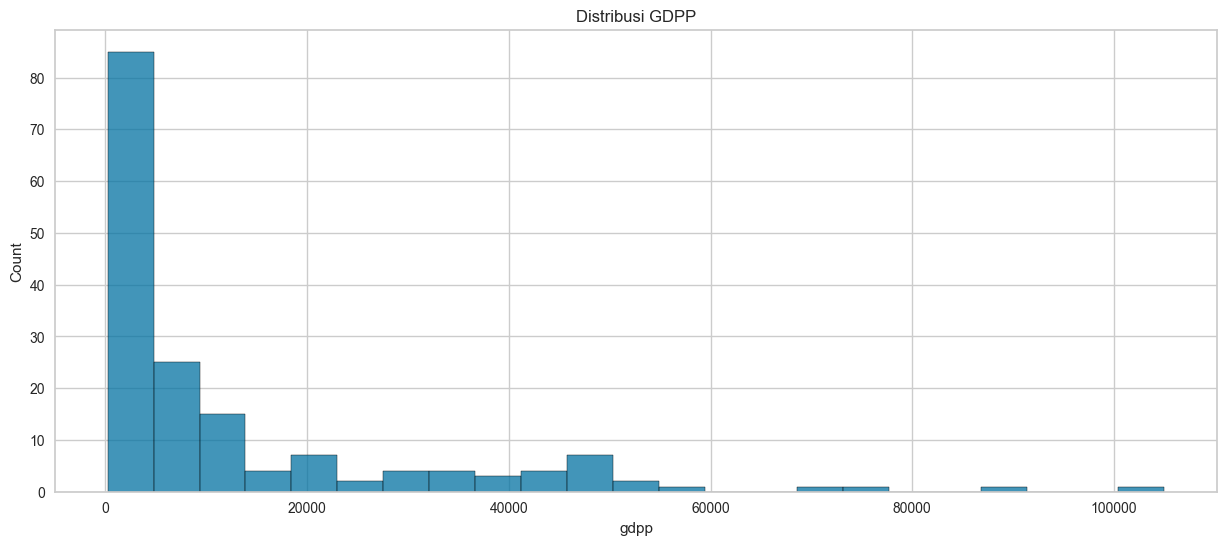

In [11]:
# cheking total biaya
plt.figure(figsize=(15,6))
sns.histplot(data_analyz['gdpp'])
plt.title('Distribusi GDPP')
plt.show()

Dari visualisasi dari rentang data negara untuk gdpp kebanyakan di 1 - 2000 dolar yang harus di perhatikan dalam menentukan untuk di bantu

<Figure size 800x550 with 0 Axes>

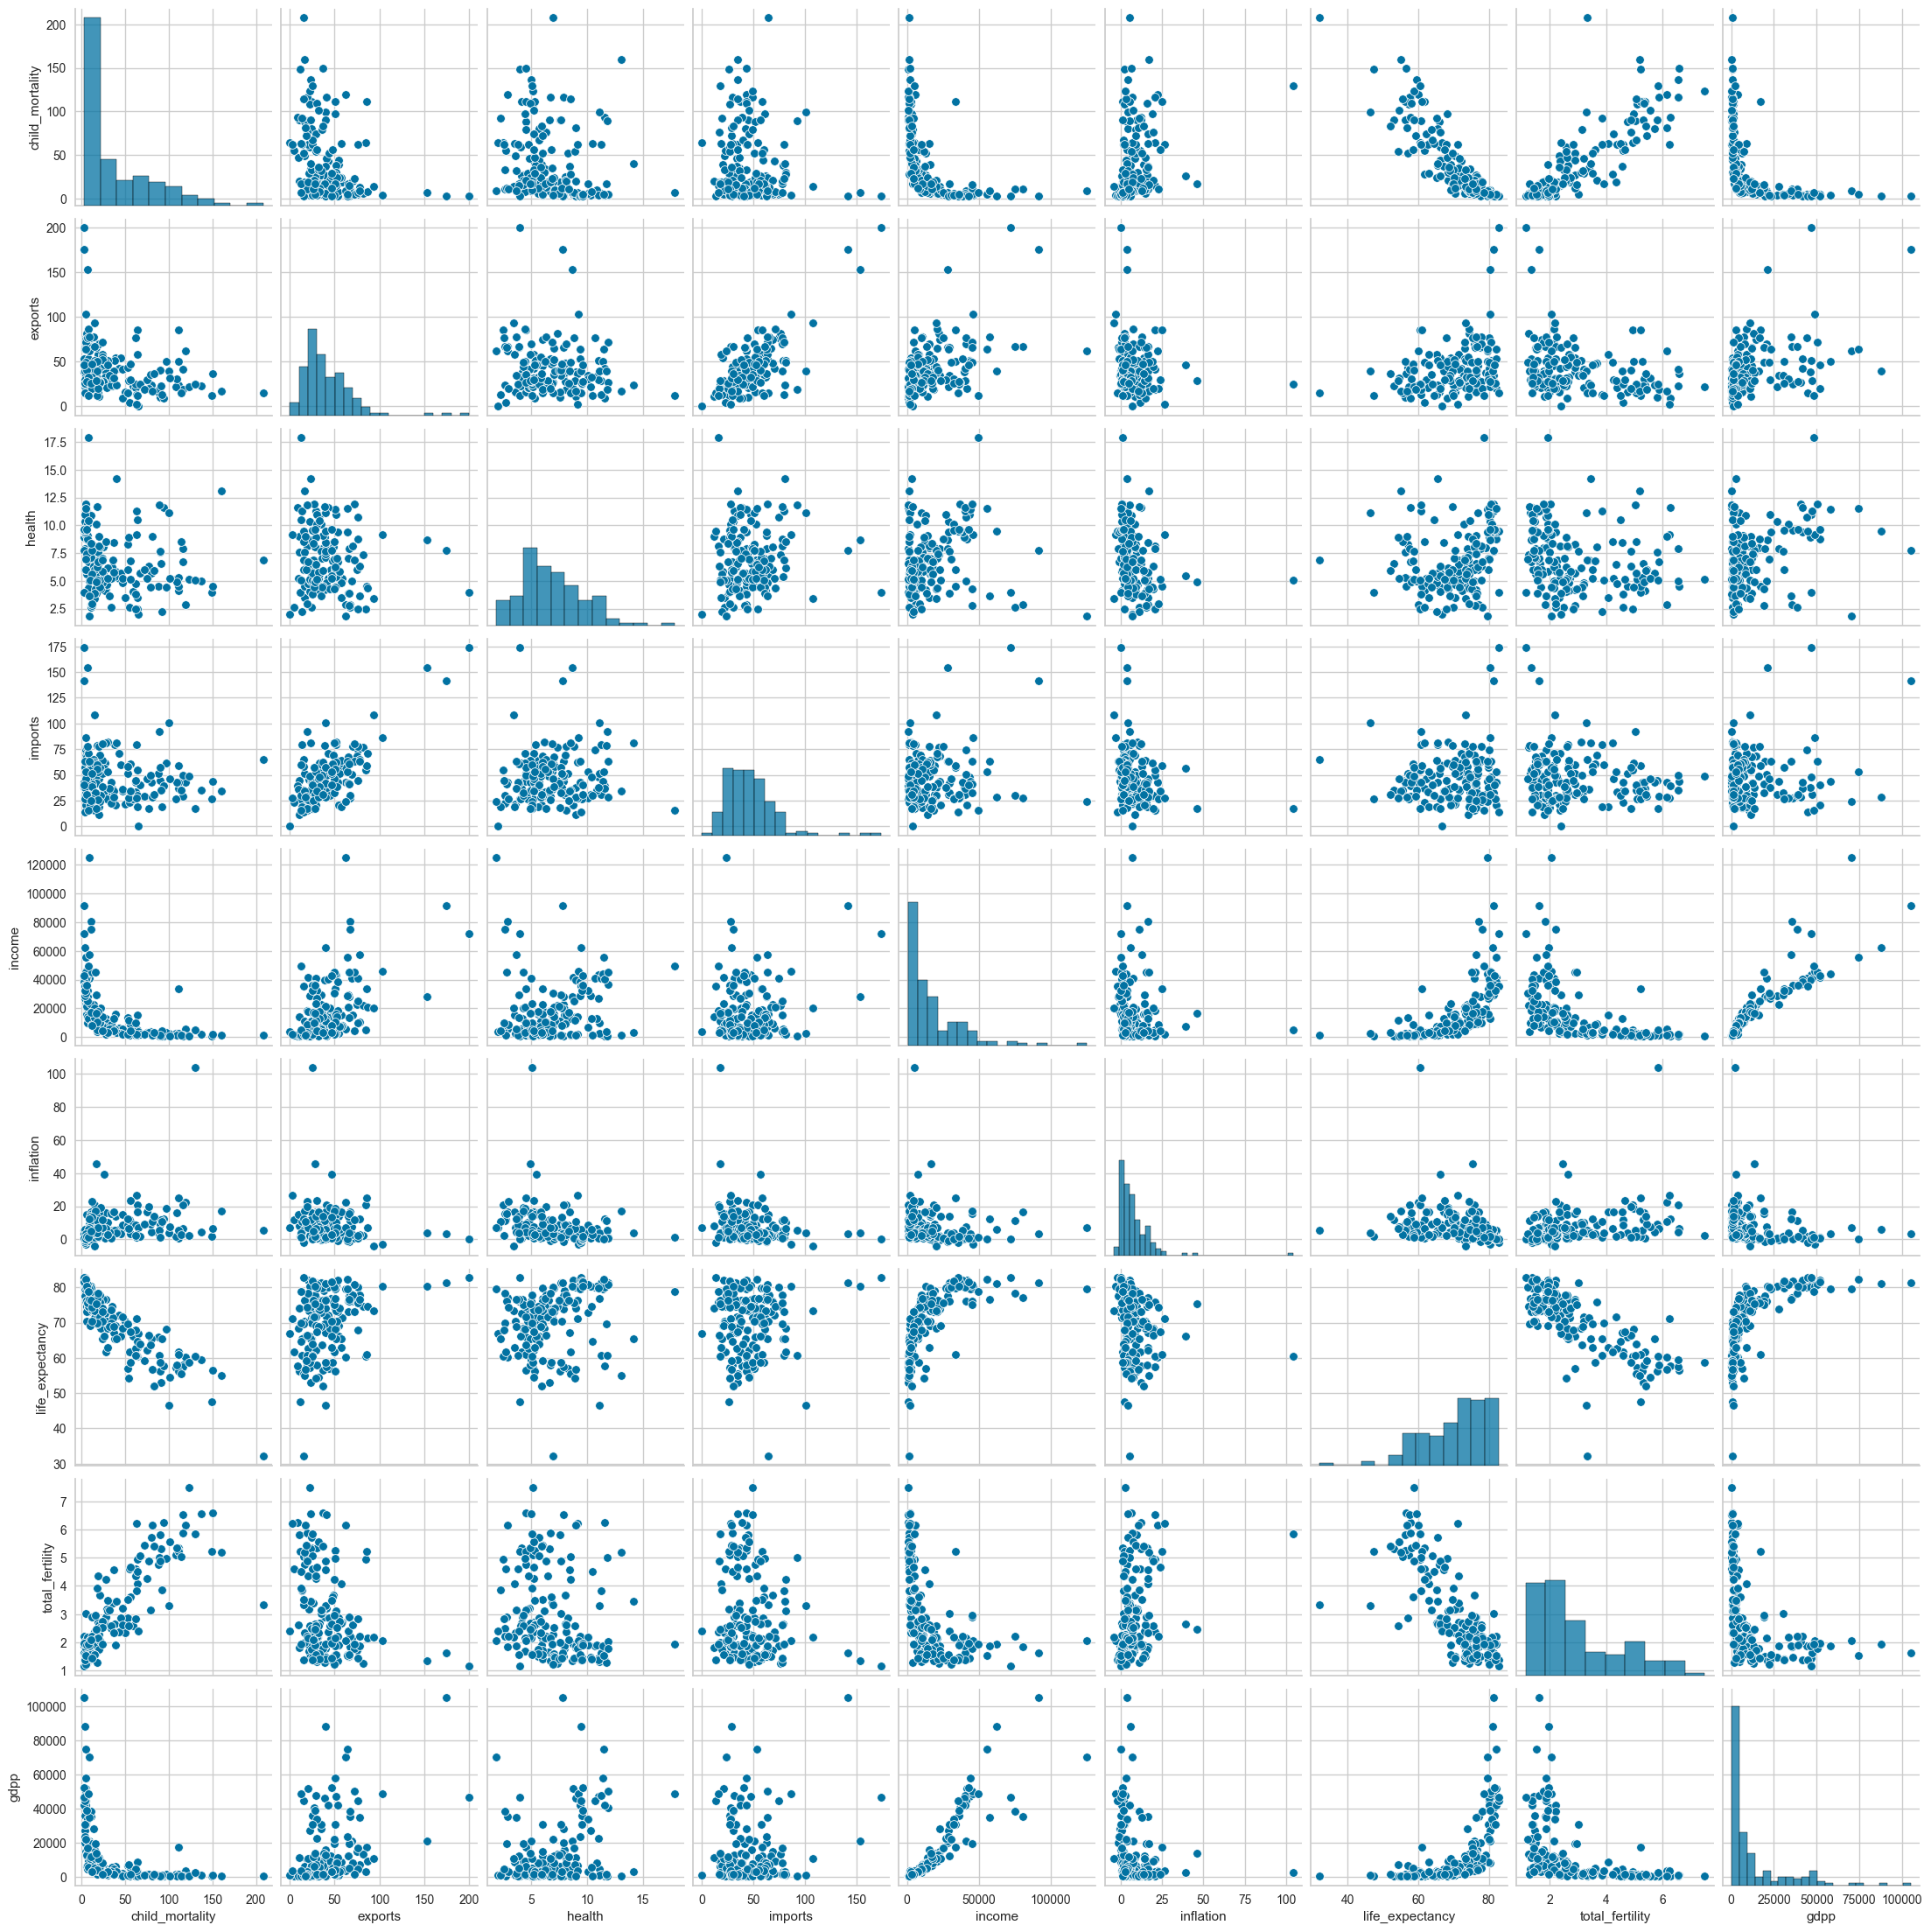

In [12]:
# checking distribution selected feature
to_Plot = ['child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp']
plt.figure()
sns.pairplot(data_analyz[to_Plot])  
#Taking hue 
plt.show()


Hasil visualisasi dapat di simpulkan sebagai berikut:
- Adanya outlier sehingga harus di handling
- Multicolynearity atau adanya hubungan linear antar faeture yaitu (income dengan gdpp) sedangkan untuk (child_mothality dengan life_expecancy)

In [63]:
df

country  child_mortality  exports  health  imports  income  \
0            Afghanistan             90.2     10.0    7.58     44.9    1610   
1                Albania             16.6     28.0    6.55     48.6    9930   
2                Algeria             27.3     38.4    4.17     31.4   12900   
3                 Angola            119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda             10.3     45.5    6.03     58.9   19100   
..                   ...              ...      ...     ...      ...     ...   
162              Vanuatu             29.2     46.6    5.25     52.7    2950   
163            Venezuela             17.1     28.5    4.91     17.6   16500   
164              Vietnam             23.3     72.0    6.84     80.2    4490   
165                Yemen             56.3     30.0    5.18     34.4    4480   
166               Zambia             83.1     37.0    5.89     30.9    3280   

     inflation  life_expectancy  total_fertility   gdpp  
0         9.44             56.2             5.82    553  
1         4.49             76.3             1.65   4090  
2        16.10             76.5             2.89   4460  
3        22.40             60.1             6.16   3530  
4         1.44             76.8             2.13  12200  
..         ...              ...              ...    ...  
162       2.62             63.0             3.50   2970  
163      45.90             75.4             2.47  13500  
164      12.10             73.1             1.95   1310  
165      23.60             67.5             4.67   1310  
166      14.00             52.0             5.40   1460  

[167 rows x 10 columns]

Conclusions:

Dari hasil Exploratory data dapat saya simpulkan sebagai berikut:




---

# v. Feature Engineering

In [13]:
# Copy dataframe agar tidak mengulang jika salah
data = df.copy()
data.head()

country  child_mortality  exports  health  imports  income  \
0          Afghanistan             90.2     10.0    7.58     44.9    1610   
1              Albania             16.6     28.0    6.55     48.6    9930   
2              Algeria             27.3     38.4    4.17     31.4   12900   
3               Angola            119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda             10.3     45.5    6.03     58.9   19100   

   inflation  life_expectancy  total_fertility   gdpp  
0       9.44             56.2             5.82    553  
1       4.49             76.3             1.65   4090  
2      16.10             76.5             2.89   4460  
3      22.40             60.1             6.16   3530  
4       1.44             76.8             2.13  12200

In [14]:
# Cek data duplikat
data.duplicated().sum()

0

Tidak ada data yang terduplikat

### Checking and Handling Missing Value

In [15]:
data.isnull().sum()

country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64

Tidak ada data yang kosong (missing value)

### Handling Outlier

Seperti penjelasan di atas adanya outlier sehingga harus di atasi, dalam hal ini saya menggunakan metode Winsorization.

Cara melakukannya adalah memfilter ditribusi normal dan tidak dengan menggunakan motode statistika skewnes dan menset threshold.
- Threshold untuk Distribusi Normal: 
Biasanya, nilai skewness yang mendekati nol (`misalnya, antara -0.5 hingga 0.5`) menunjukkan bahwa distribusi data cenderung normal. 
- Threshold untuk Distribusi Skewed:
Distribusi data dikatakan skewed jika nilai skewnessnya melebihi nilai ambang tertentu. Secara umum, `nilai skewness di atas 0.5 atau di bawah -0.5` sering digunakan sebagai indikator bahwa distribusi data tidak simetris dan cenderung skewed. 


In [16]:
# Filter Numerical Columns into Variable
num_cols = data.select_dtypes(include=np.number).columns.to_list()

# Making data and columns for normal distribution
dataNum_normal = []
listCols_normal = []

# Making data and columns for skewed distribution
dataNum_skewed = []
listCols_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for cols in num_cols:
    skewness = data[cols].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        listCols_normal.append(cols)
        dataNum_normal.append([cols, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        listCols_skewed.append(cols)
        dataNum_skewed.append([cols, skewness])

In [17]:
# Showing skewed columns
data_normal = pd.DataFrame(data=dataNum_normal, columns=['kolom_normal', 'skewness'])
data_normal

Empty DataFrame
Columns: [kolom_normal, skewness]
Index: []

In [18]:
# Showing skewed columns
data_skew = pd.DataFrame(data=dataNum_skewed, columns=['kolom_skewed', 'skewness'])
data_skew

kolom_skewed  skewness
0  child_mortality  1.450774
1          exports  2.445824
2           health  0.705746
3          imports  1.905276
4           income  2.231480
5        inflation  5.154049
6  life_expectancy -0.970996
7  total_fertility  0.967092
8             gdpp  2.218051

In [20]:
# # Capping Method for Skewed Distribution
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=listCols_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
data_capped = winsorizer_skewed.fit_transform(data)

In [21]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

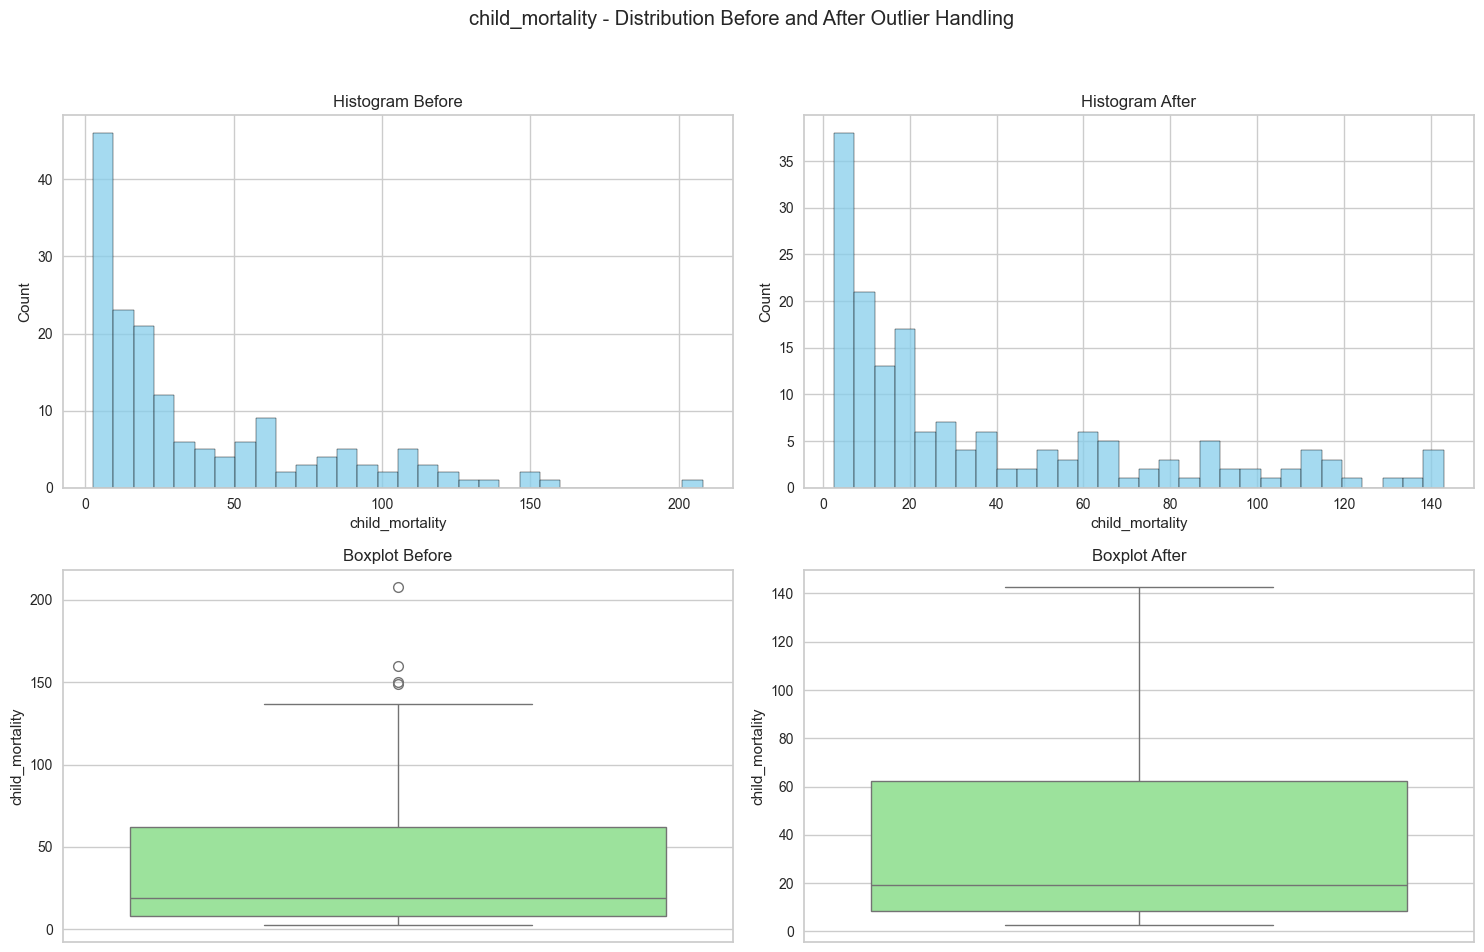

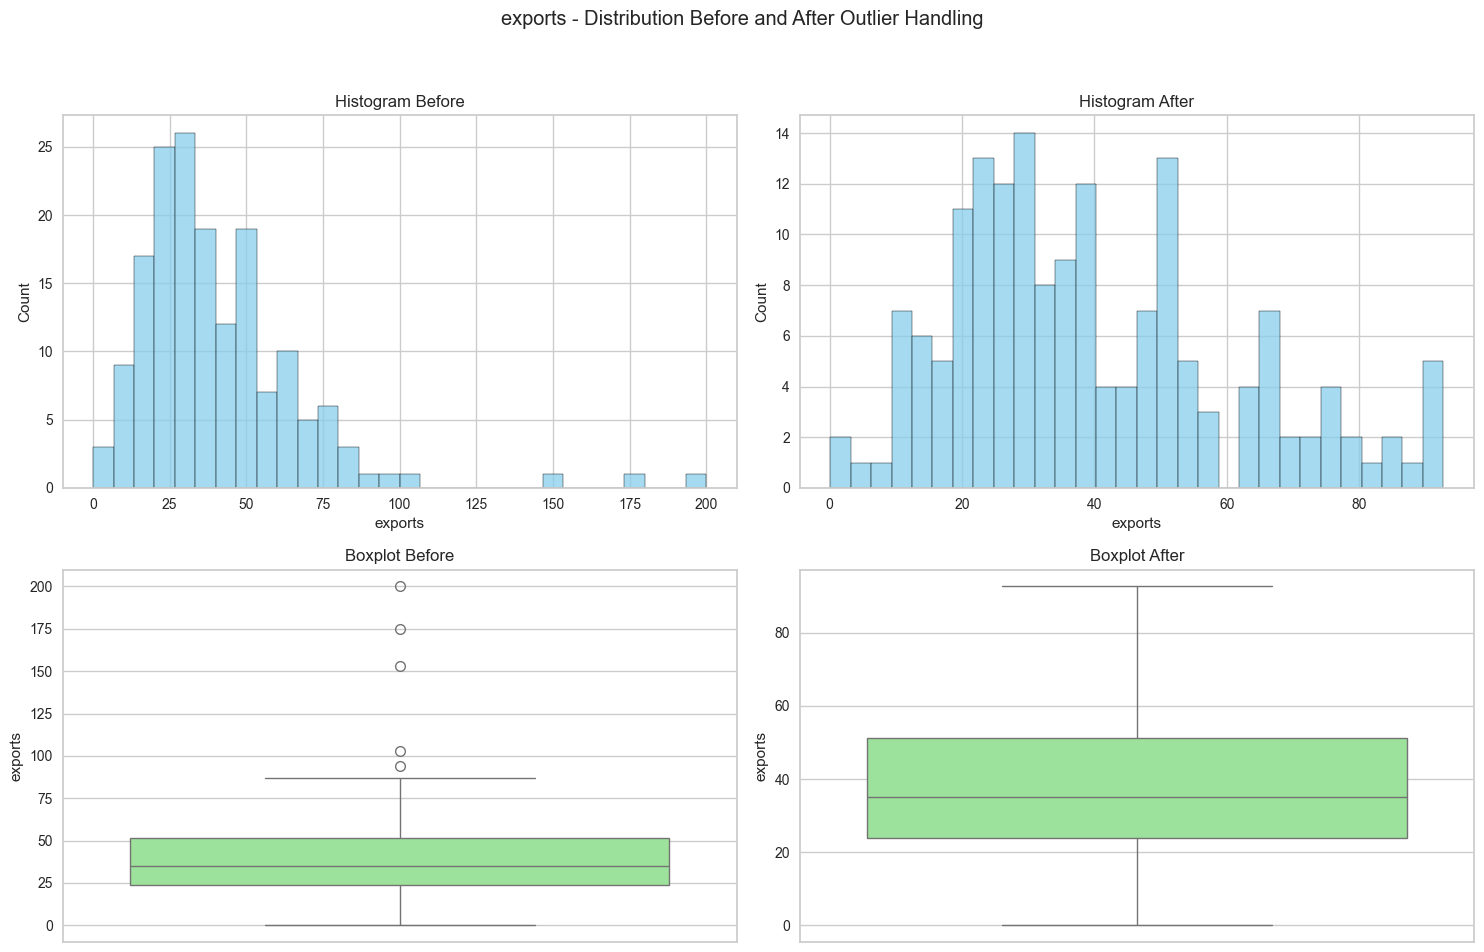

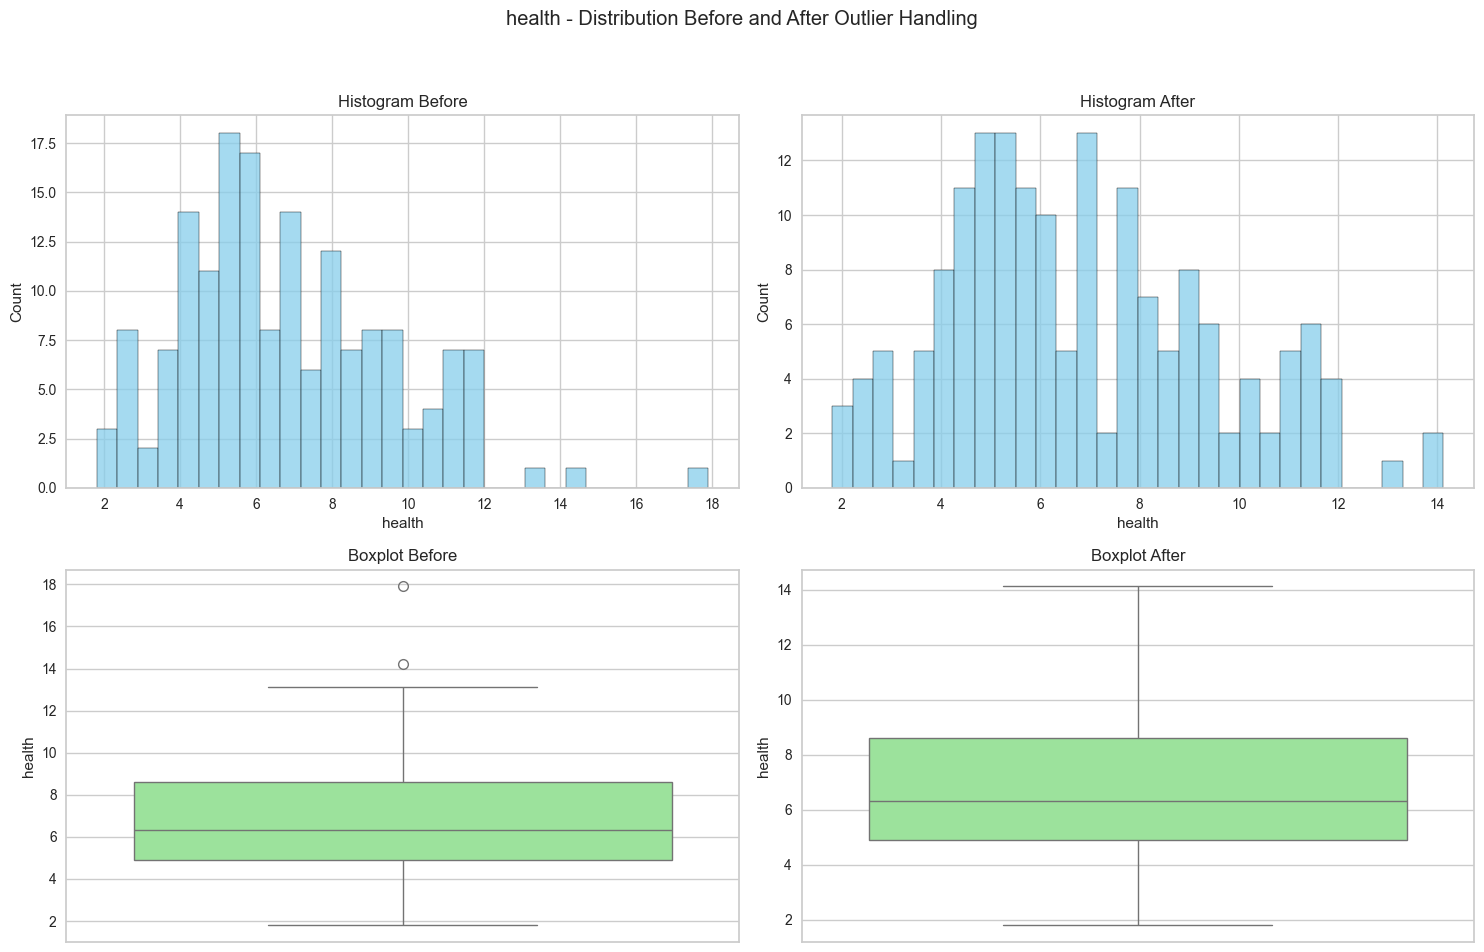

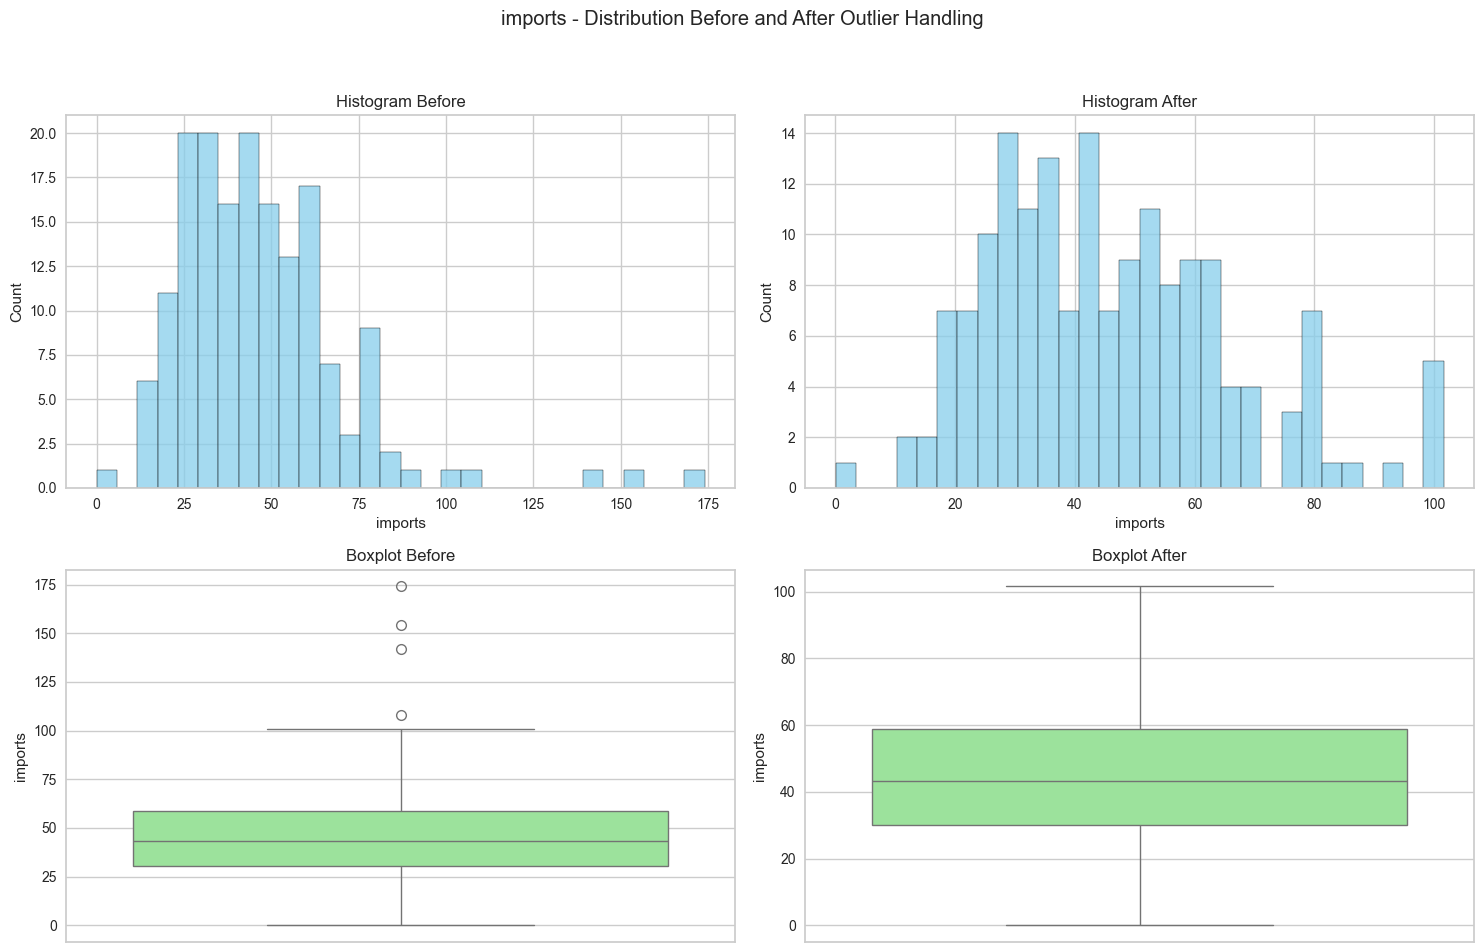

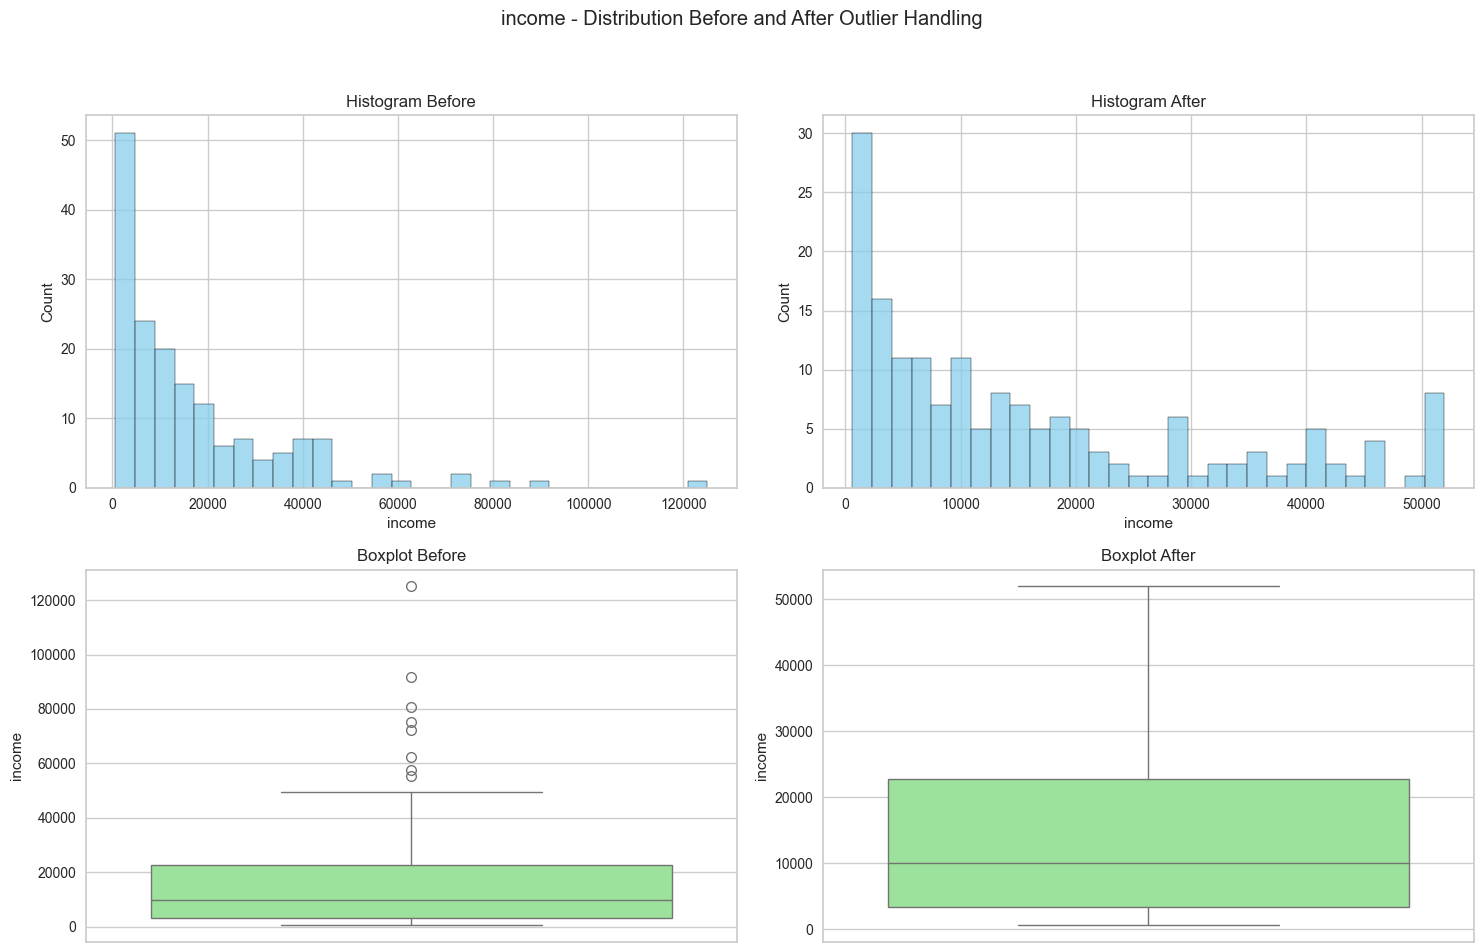

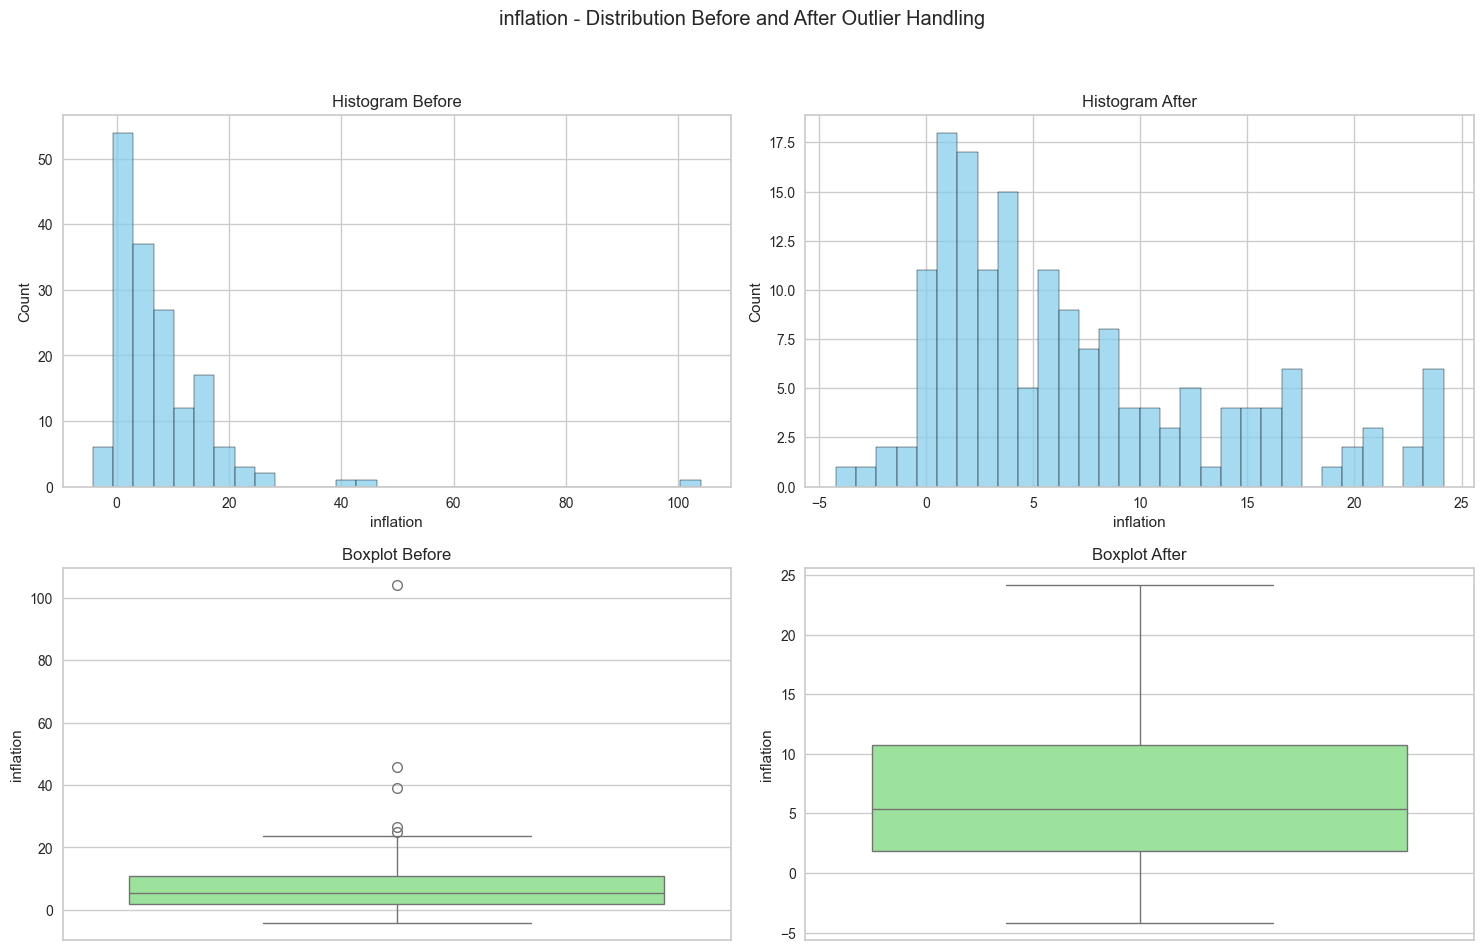

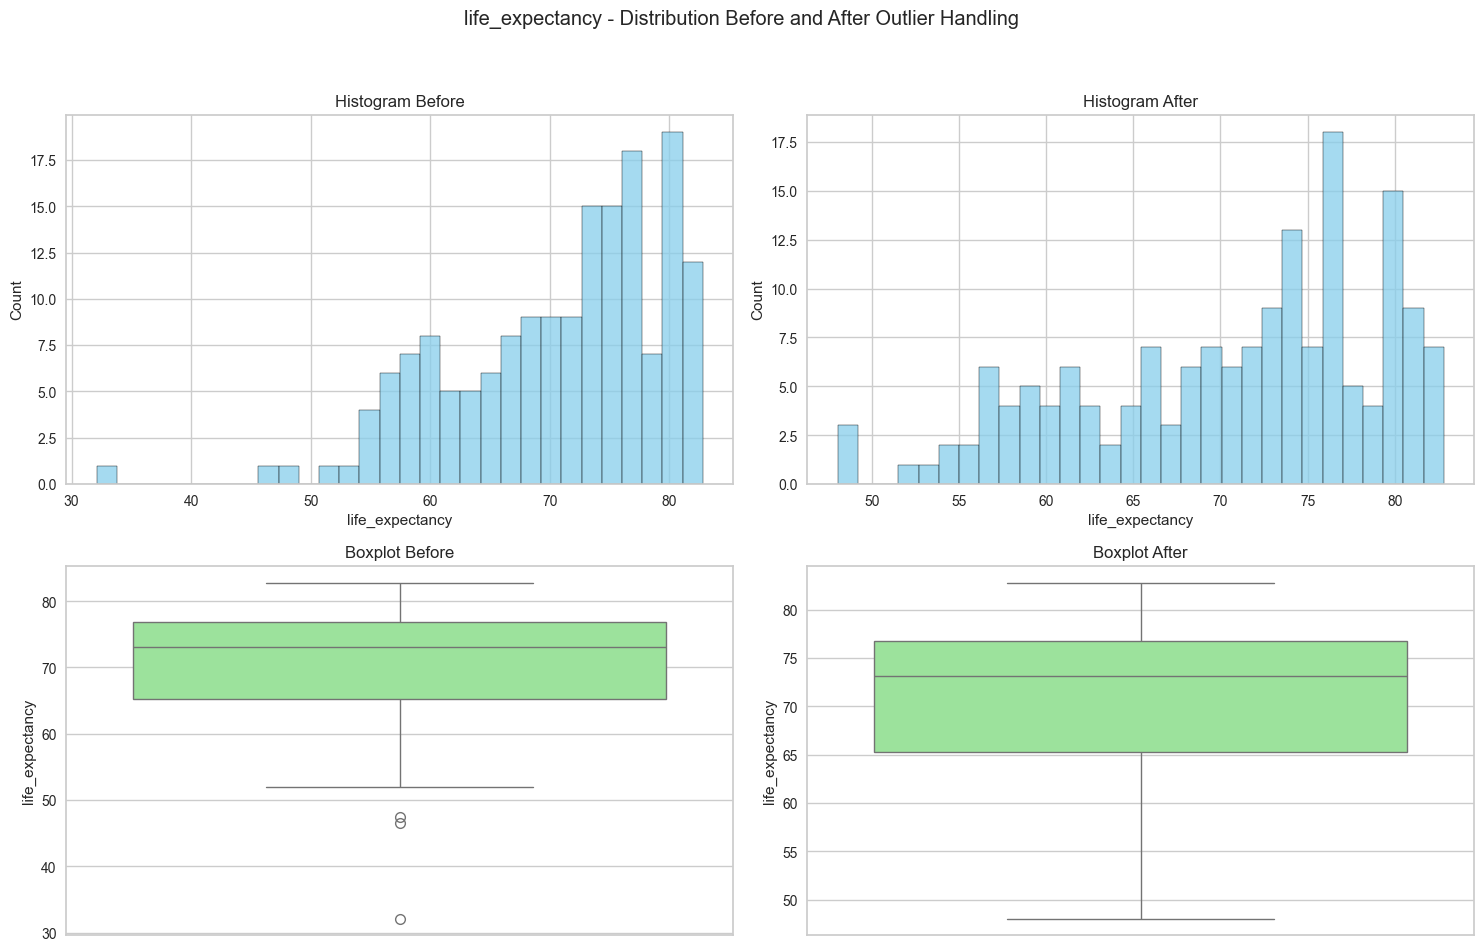

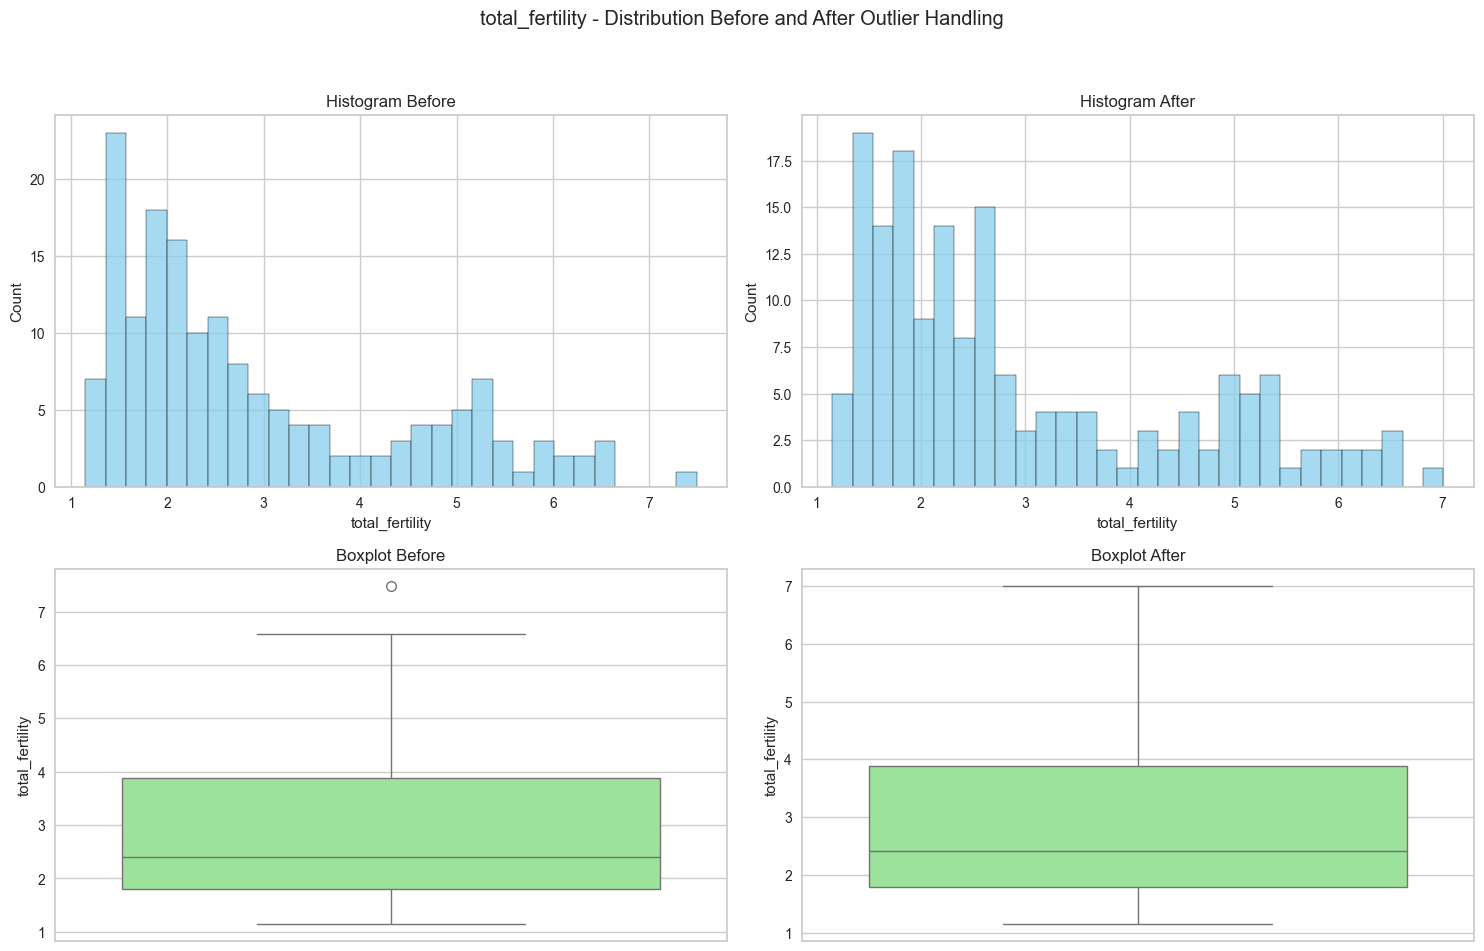

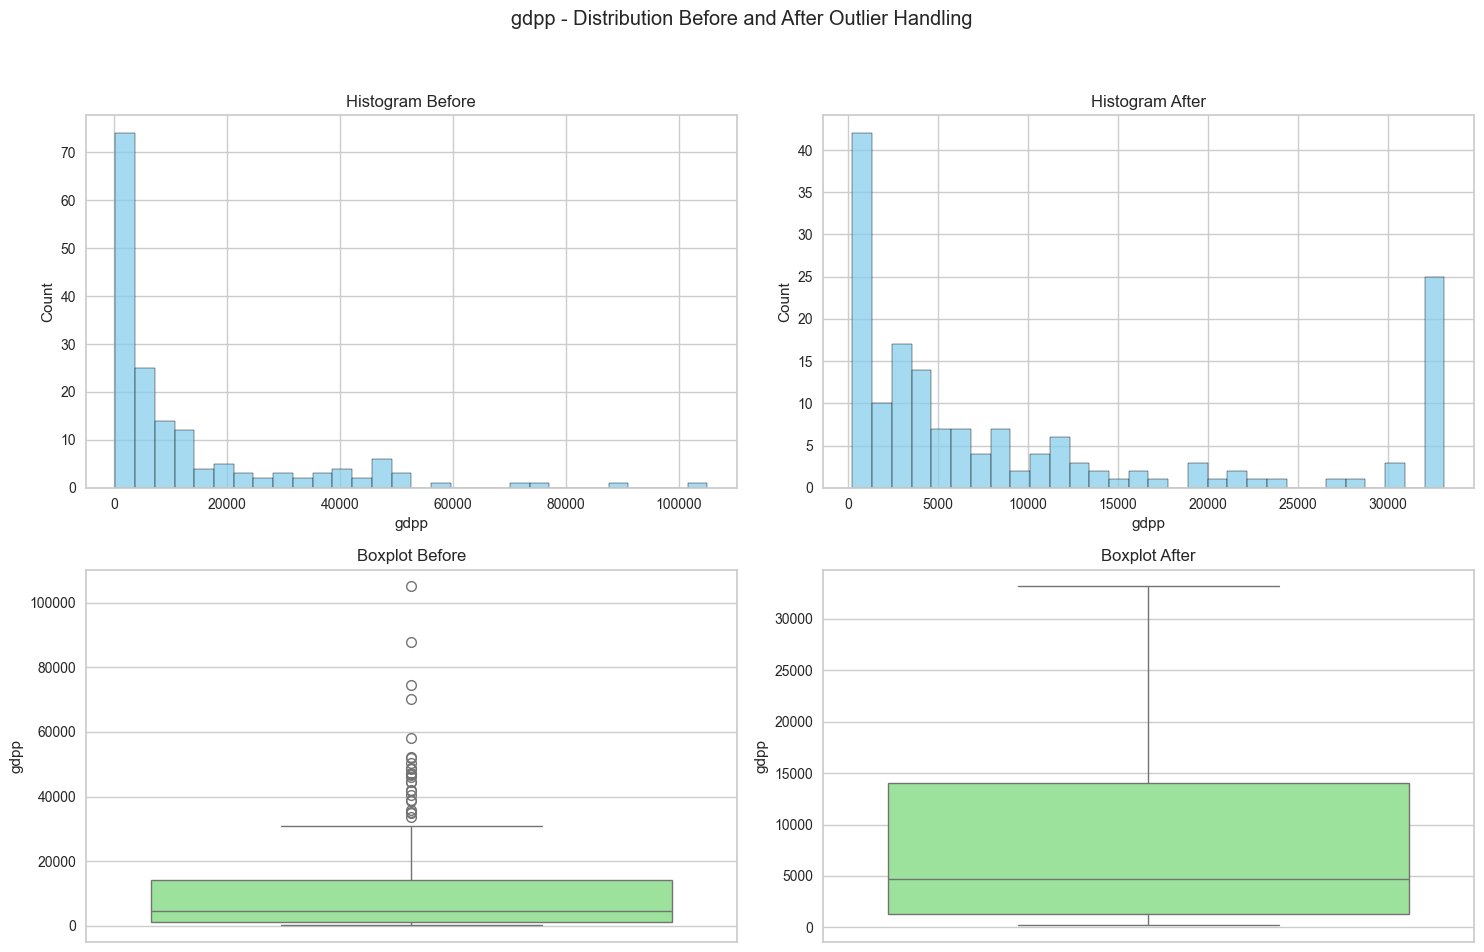

In [22]:

# Using the Function
for col in num_cols:
    outlier_handling_plot_comparison(data, data_capped, col)

Sudah terlihat bahwa outlier di decrease(dihilangkan dan diganti) dan selanjutnya scaling.

catatan: karena objective kita adalah Kmeans tidak menggunakan kolom categorical, sehingga tidak encoding

### Scaling Data

In [23]:
# membuat subset data untuk di fit Kmeans 
# --------------------------

# Filter Numerical Columns into Variable
num_cols = data.select_dtypes(include=np.number).columns.to_list()
# subset dataspilt
data_spilt = data_capped[num_cols]
data_spilt.head()

child_mortality  exports  health  imports   income  inflation  \
0             90.2     10.0    7.58     44.9   1610.0       9.44   
1             16.6     28.0    6.55     48.6   9930.0       4.49   
2             27.3     38.4    4.17     31.4  12900.0      16.10   
3            119.0     62.3    2.85     42.9   5900.0      22.40   
4             10.3     45.5    6.03     58.9  19100.0       1.44   

   life_expectancy  total_fertility   gdpp  
0             56.2             5.82    553  
1             76.3             1.65   4090  
2             76.5             2.89   4460  
3             60.1             6.16   3530  
4             76.8             2.13  12200

In [24]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_spilt)

In [25]:
data_scaled

array([[ 1.36980194, -1.39110684,  0.29601312, ..., -1.70222504,
         1.91527602, -0.84634107],
       [-0.55046422, -0.54354731, -0.09119005, ...,  0.66332125,
        -0.86277926, -0.54082746],
       [-0.27129509, -0.05384625, -0.98589252, ...,  0.68685903,
        -0.03669088, -0.50886816],
       ...,
       [-0.37565738,  1.52826487,  0.01782832, ...,  0.28671687,
        -0.66291917, -0.78095407],
       [ 0.48533152, -0.44937403, -0.60620786, ..., -0.37234081,
         1.14914567, -0.78095407],
       [ 1.18455887, -0.11976755, -0.33930082, ..., -2.19651829,
         1.63547189, -0.7679976 ]])

Alasan menggunakan StandardScaler cocok untuk algoritma PCA (Principal Component Analysis) dan KMeans clustering.
berikut alasan lain:

- Menghilangkan Bias pada Variabel: Ketika variabel memiliki rentang yang berbeda, mereka dapat memiliki dampak yang tidak proporsional pada analisis

- Mempertahankan Struktur Data: mempertahankan struktur data relatif penting untuk memastikan bahwa komponen utama yang dihasilkan mewakili variasi yang signifikan dalam data

- Menghindari Pemusatan Pada Tengah Rentang: KMeans sangat dipengaruhi oleh pusat dan dispersi dari setiap fitur dalam data.

Selanjutnya melakukan PCA Karena Kmeans 

### Demensionality Reduction

In [26]:
# fit df_scaled dengan pca untuk plot cumulative  variance
pca = PCA()
pca.fit(data_scaled)

PCA()

In [27]:
data_scaled.shape

(167, 9)

- Melihat Eigenvalues dan Cummulative of Explained Variance Ratio

Text(0, 0.5, 'Eigenvalues')

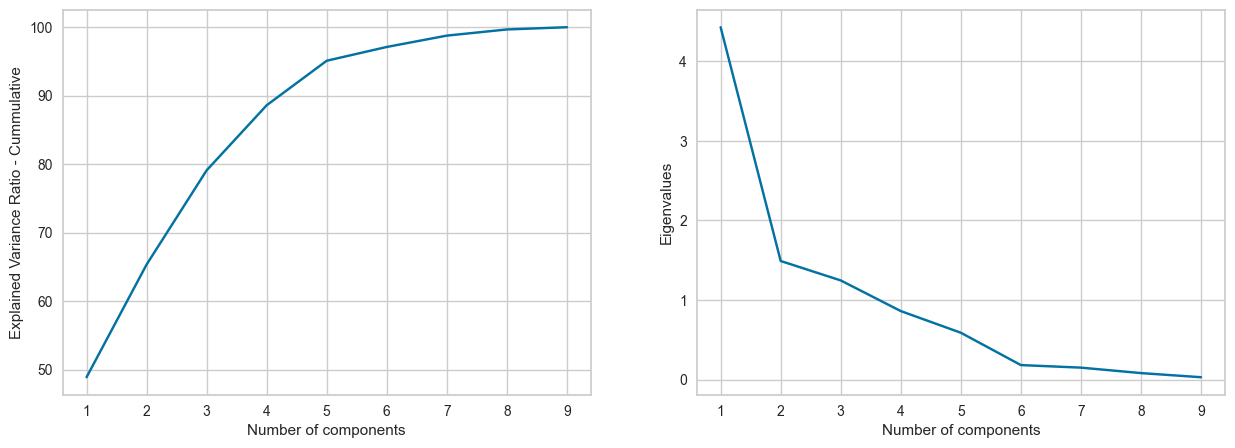

In [28]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 10), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)

plt.plot(range(1, 10), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

explain:
- Hasil visualisasi dari Explained Variance Ratio Cummulative jika ingin 95% infomasinya adalah `5` faeture
- Hasil dari Eigenvalues adalah 2 di angka komponen 2 yang berpengaruh terhadap variance 

**Hitung besar kemungkinan berapa feature yang digunakan**

In [29]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
print('Features: ',num_features)

Features:  5


In [30]:
# fitting pca dengan 95% informasi yang diambil
pca = PCA(n_components=0.95)
pca.fit(data_scaled)

data_scaled_pca = pca.transform(data_scaled)

In [31]:
data_scaled_pca

array([[-3.17791739e+00, -2.51291807e-01, -1.01147443e+00,
         7.78803595e-01, -1.41022495e-02],
       [ 4.34978909e-01, -2.18700436e-01, -2.92590675e-01,
        -1.39124146e+00,  1.56711346e-01],
       [-4.16783953e-01, -6.13869574e-01,  1.63785860e+00,
        -6.15021493e-01,  5.36603860e-01],
       [-3.30640928e+00,  1.06664902e+00,  2.15121921e+00,
         1.69867748e+00,  1.60550529e-01],
       [ 1.25324554e+00,  5.47778085e-01, -1.36955092e-01,
        -7.16889756e-01, -3.94628179e-01],
       [-2.86331783e-02, -2.16769200e+00,  1.04348335e+00,
        -3.42502164e-02,  1.65971957e+00],
       [-2.02343083e-01, -3.86555635e-01,  3.87940790e-01,
        -1.63906854e+00,  3.98966166e-02],
       [ 2.65113941e+00, -2.24611465e+00, -4.06301168e-01,
         6.43814169e-01, -7.38102424e-01],
       [ 3.41037290e+00, -5.10214852e-01, -8.24463487e-01,
         1.13265715e+00,  4.03642881e-03],
       [-2.16017878e-01, -5.19685146e-01,  1.30455864e+00,
        -1.54867718e-01

Sudah di fit dan mendapat 5 feature yang dipakai

---

# vi. Modeling

Dalam clustering sebelum prediksi kita perlu mencari nilai optimal dari n_components cluster. cara menentukannya bisa secara objective dari User atau menggunakan metode statistika (Elbow method, Silhoutte Scor, atau yang lain)

#### **Elbow method**

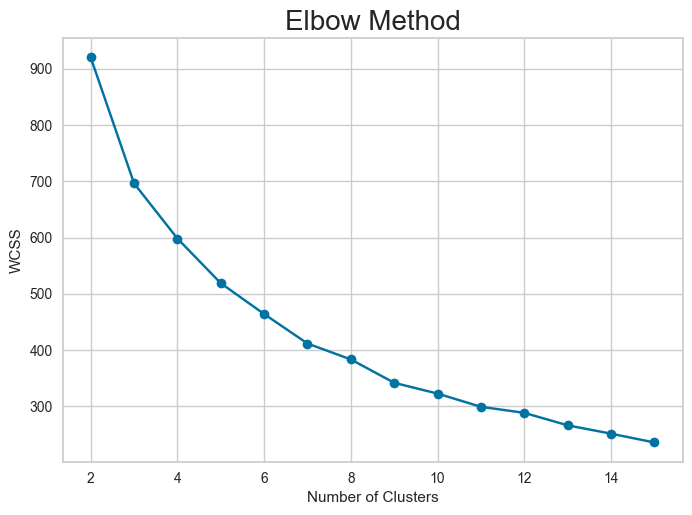

In [32]:
# Find the optimal number of clusters using Elbow Method

wcss = []
random_state = 2
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")

plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Dari hasil visualisasi number cluster yang berpengaruh adalah `3`

Elbow Method to determine the number of clusters to be formed:


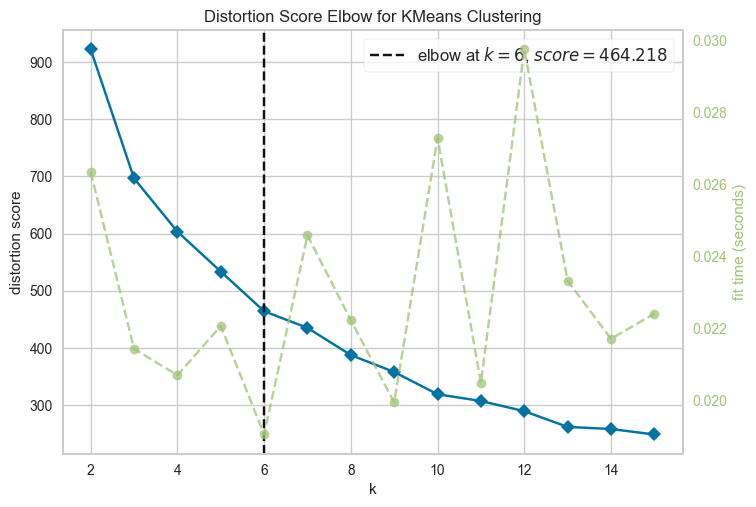

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=15)
Elbow_M.fit(data_scaled_pca)
Elbow_M.show()

Berdasarkan hasil visualisasi pertama dengan set Max K = 15 saya asumsikan penurunan di` 3 atau 5` cluster. sedangkan di libraries  Kelbow Yellowbrick dengan set Max K = 15 cluster di angka `6`


--

### **Silhoutte Plot & Silhoutte Score**

In [34]:
# Function to create Silhouette Plot


def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
     

For n_clusters = 2 The average silhouette_score is : 0.30401562043041164
For n_clusters = 3 The average silhouette_score is : 0.29996357446851896
For n_clusters = 4 The average silhouette_score is : 0.2979356438179228
For n_clusters = 5 The average silhouette_score is : 0.27288334955473226
For n_clusters = 6 The average silhouette_score is : 0.27046832554375894
For n_clusters = 7 The average silhouette_score is : 0.29201815615388904
For n_clusters = 8 The average silhouette_score is : 0.3035231291245573
For n_clusters = 9 The average silhouette_score is : 0.27783663637700806
For n_clusters = 10 The average silhouette_score is : 0.2609991540865965
For n_clusters = 11 The average silhouette_score is : 0.2636393887357523
For n_clusters = 12 The average silhouette_score is : 0.2490951629358808
For n_clusters = 13 The average silhouette_score is : 0.2553871470242107
For n_clusters = 14 The average silhouette_score is : 0.27425838325561824


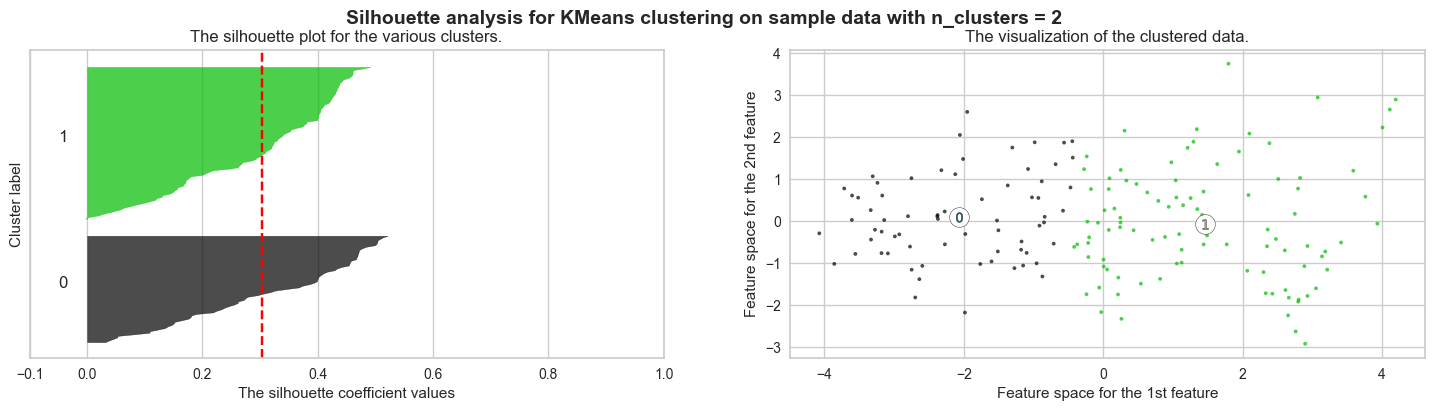

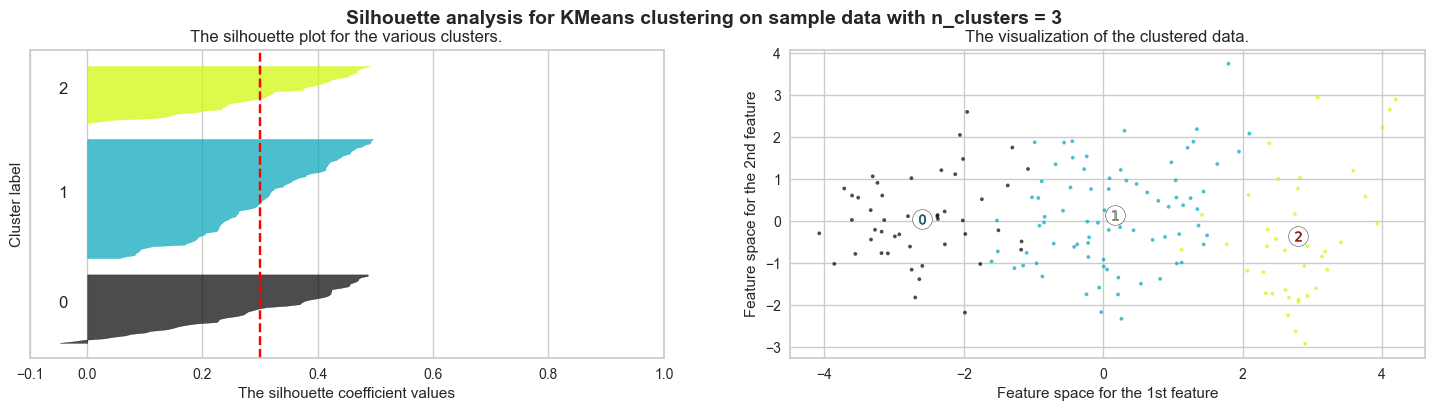

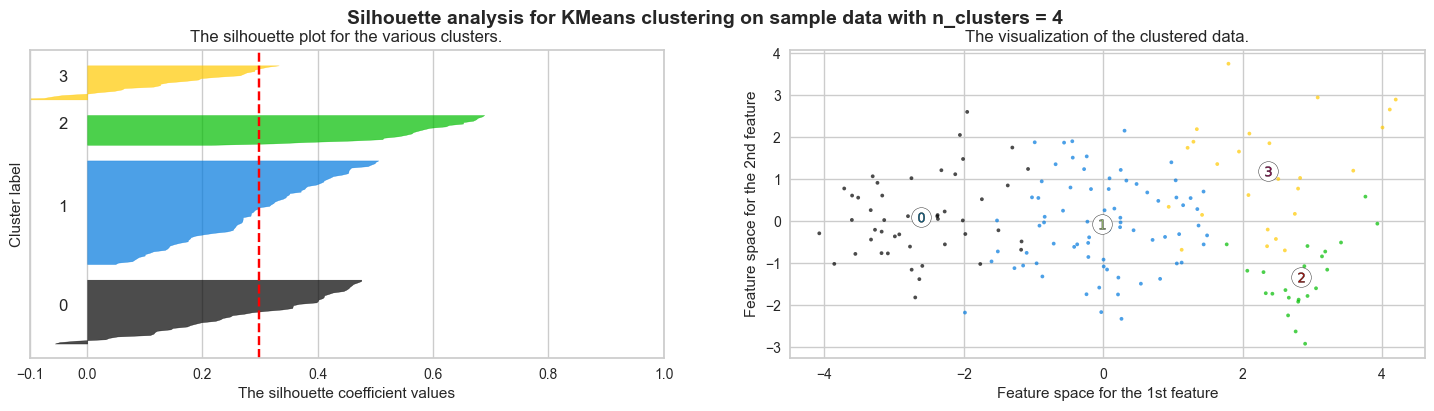

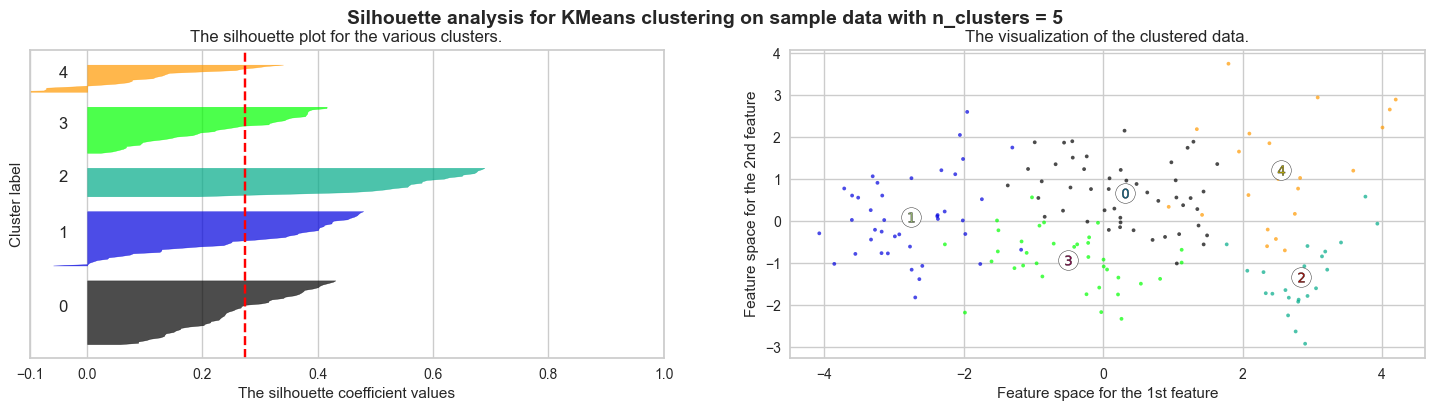

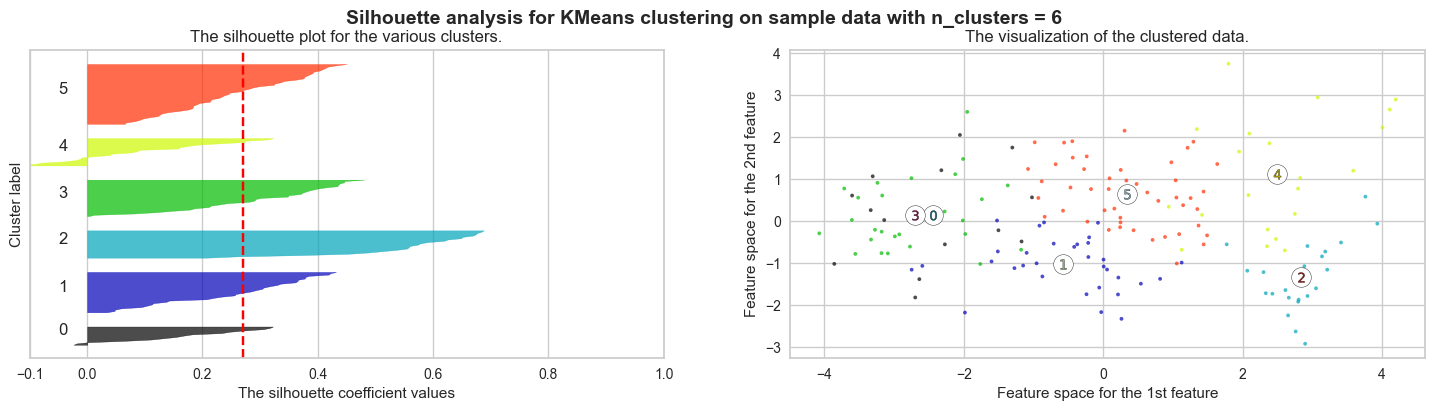

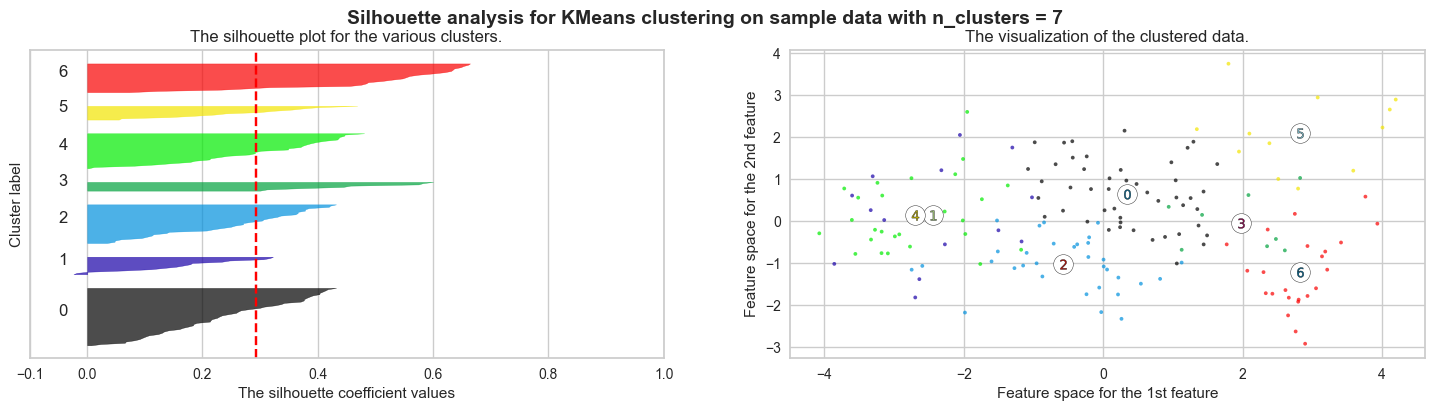

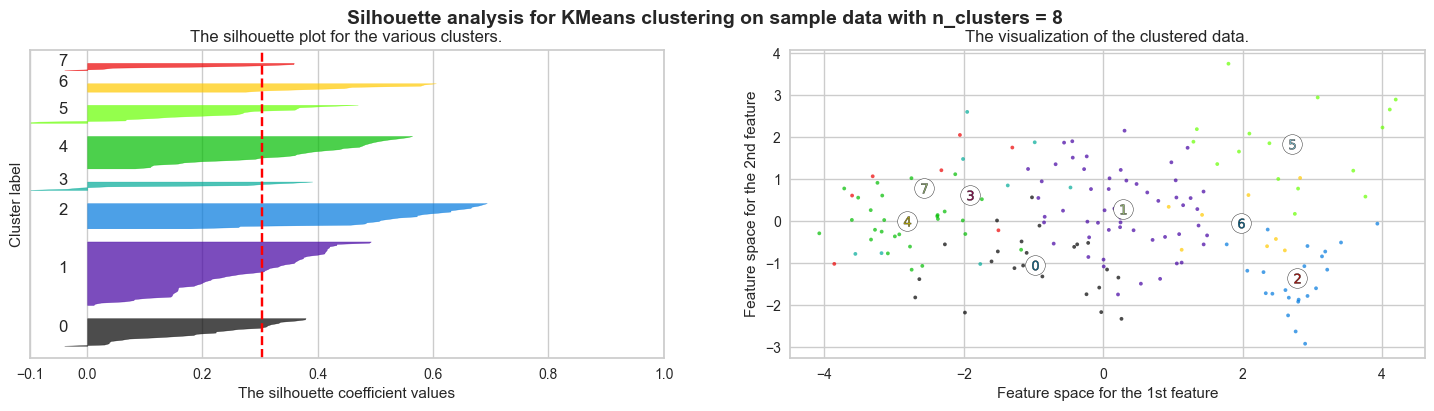

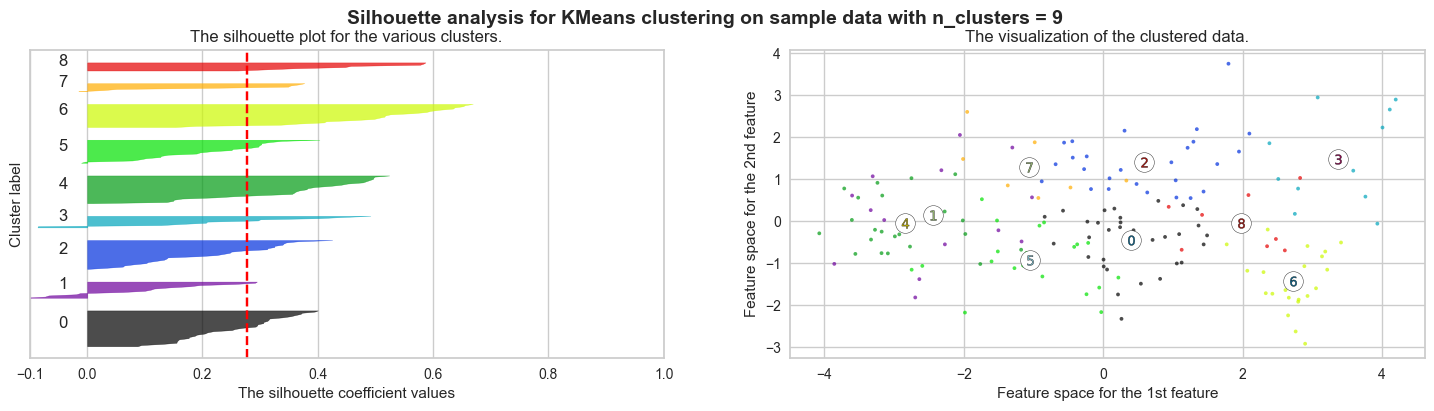

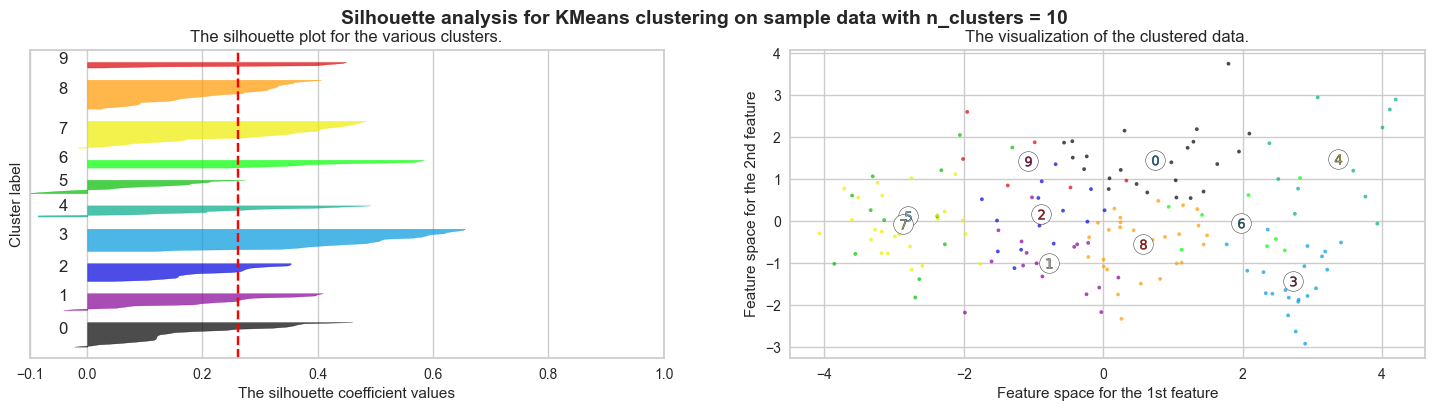

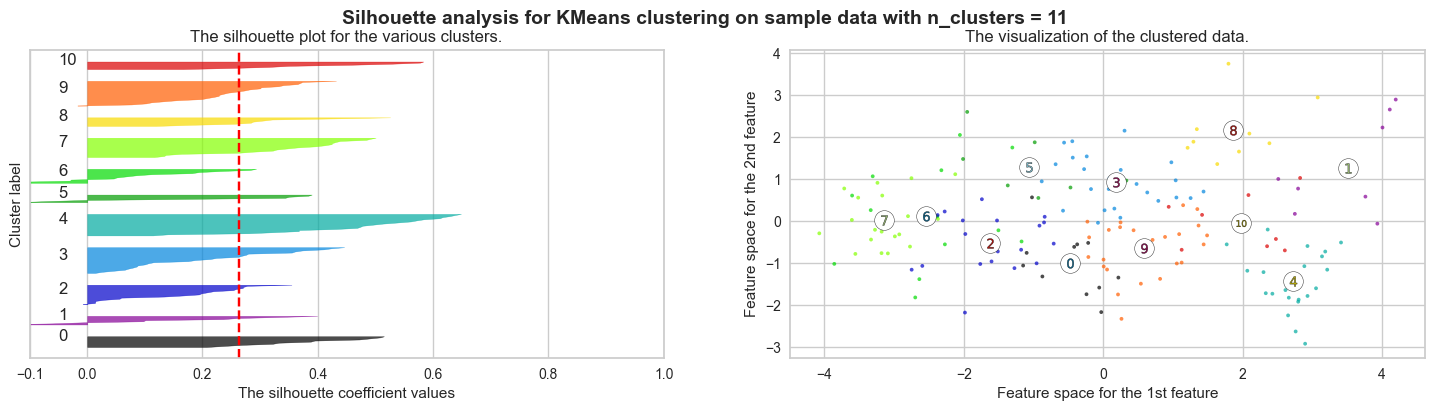

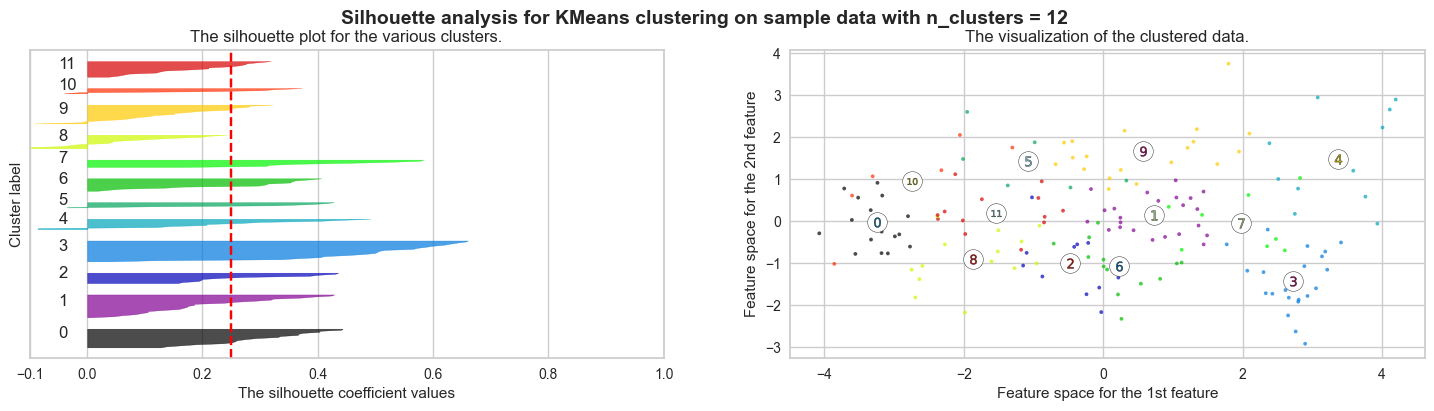

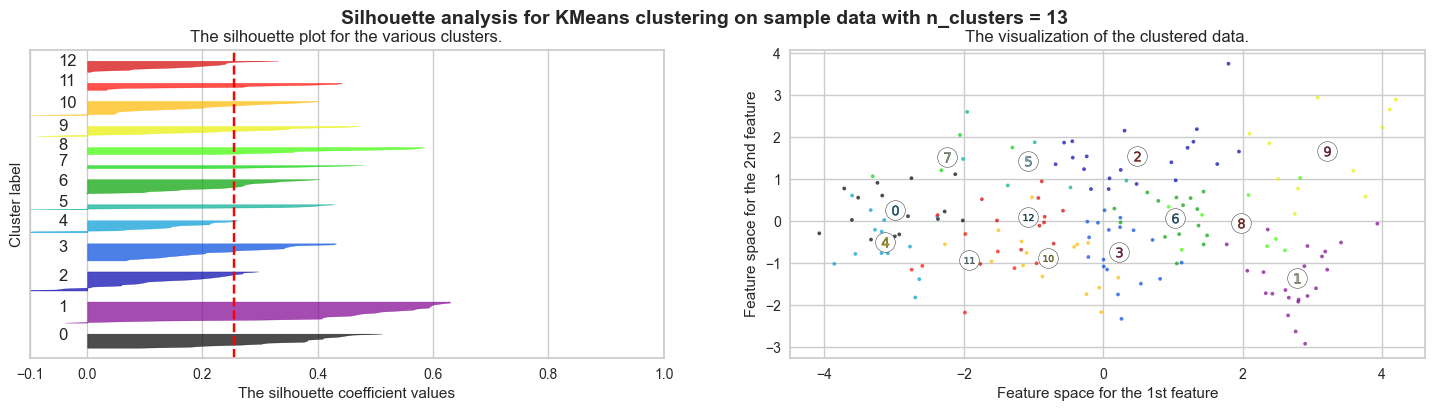

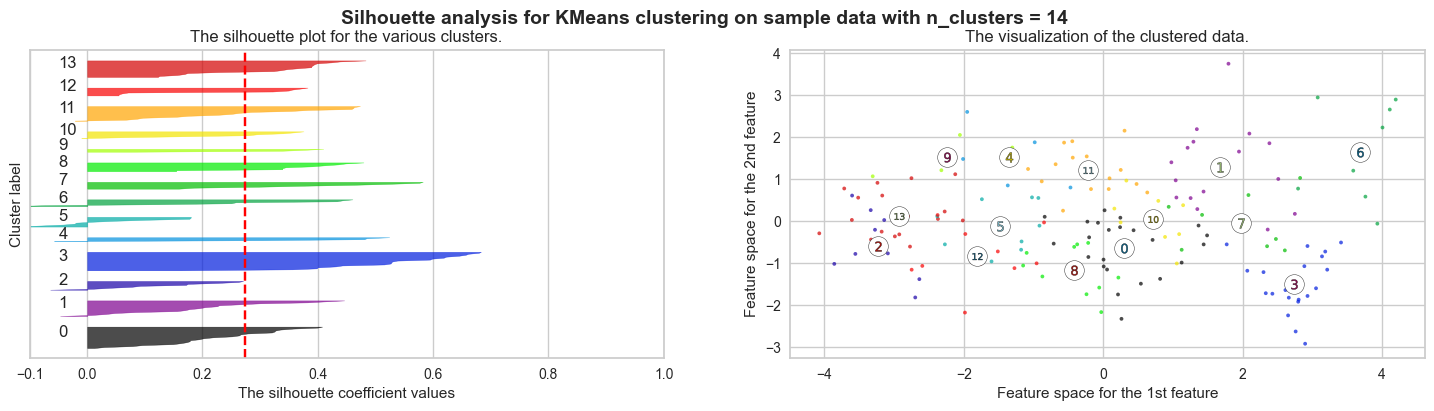

In [35]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), data_scaled_pca, random_state)

Explaiend :

Berdasarkan hasil dari visualisasi metode silhouette jumlah `cluster yang menunjukkan 3 `lebih baik dalam hal pengelompokkan data

## Model Train & Predict

In [36]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(data_scaled_pca)
pred

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

### Memasukan data cluster ke Dataframe observasi

In [37]:
# Insert clustering result into original dataset
data_analyz['cluster'] = pred
df

country  child_mortality  exports  health  imports  income  \
0            Afghanistan             90.2     10.0    7.58     44.9    1610   
1                Albania             16.6     28.0    6.55     48.6    9930   
2                Algeria             27.3     38.4    4.17     31.4   12900   
3                 Angola            119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda             10.3     45.5    6.03     58.9   19100   
..                   ...              ...      ...     ...      ...     ...   
162              Vanuatu             29.2     46.6    5.25     52.7    2950   
163            Venezuela             17.1     28.5    4.91     17.6   16500   
164              Vietnam             23.3     72.0    6.84     80.2    4490   
165                Yemen             56.3     30.0    5.18     34.4    4480   
166               Zambia             83.1     37.0    5.89     30.9    3280   

     inflation  life_expectancy  total_fertility   gdpp  
0         9.44             56.2             5.82    553  
1         4.49             76.3             1.65   4090  
2        16.10             76.5             2.89   4460  
3        22.40             60.1             6.16   3530  
4         1.44             76.8             2.13  12200  
..         ...              ...              ...    ...  
162       2.62             63.0             3.50   2970  
163      45.90             75.4             2.47  13500  
164      12.10             73.1             1.95   1310  
165      23.60             67.5             4.67   1310  
166      14.00             52.0             5.40   1460  

[167 rows x 10 columns]

### Visualisasi Output Cluster

<Axes: >

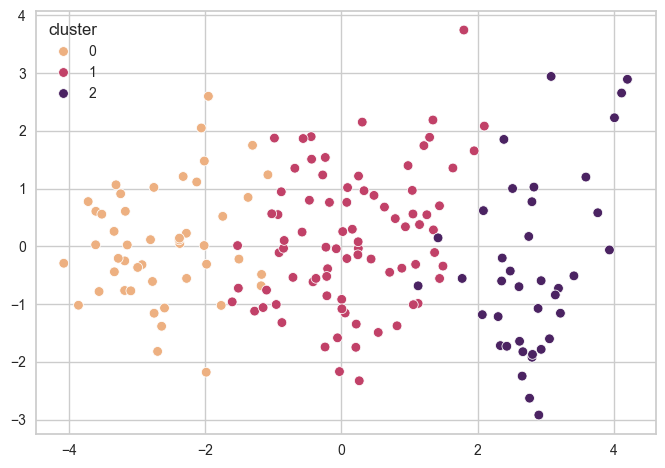

In [38]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled_pca)

data_pca_viz = pca_2d.fit_transform(data_scaled_pca)

sns.scatterplot(x=data_pca_viz[:,0], y=data_pca_viz[:,1], hue=data_analyz['cluster'], palette='flare')

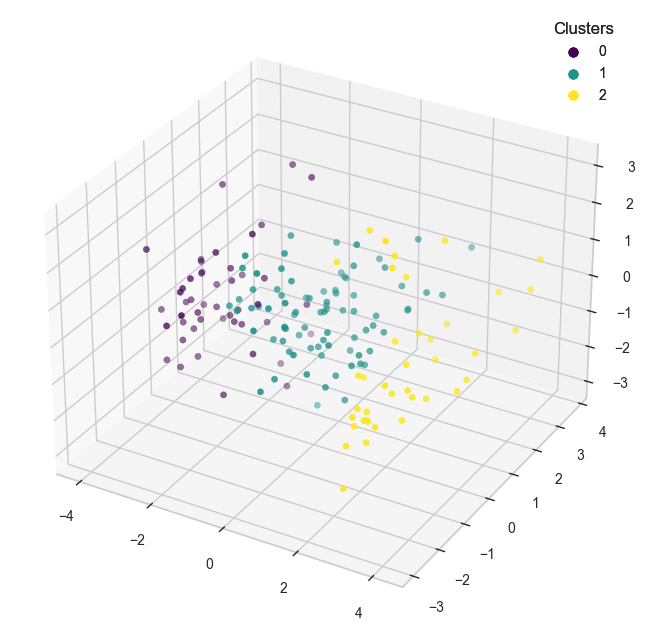

In [39]:
# Membuat dimensi jadi 3D
pca_3d = PCA(n_components=3)
pca_3d.fit(data_scaled_pca)
df_scaled_pca_3d = pca_3d.transform(data_scaled_pca)

#  plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
scatter = ax.scatter(df_scaled_pca_3d[:, 0], df_scaled_pca_3d[:, 1], df_scaled_pca_3d[:, 2],
                     c=data_analyz['cluster'], cmap='viridis')

# legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()

Conclusions:

Bedasarkan hasil yang di peroleh dalam menentukan cluster dengan Dua method Elbow method dan silhouette , `cluster 3 `yang mana lebih baik dalam pengelompokkan bisa dilihat visualisasi scatter. saya melakukan train dan predikisi Kmeans setelah itu saya memasukan ke dataframe observasi.

---

# vii. Model Infernce

### Model saving

In [40]:
# Model Saving
with open('model/scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model/pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)

with open('model/kmeans.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

### Load Model

In [41]:
# Load Model

with open("model/scaler.pkl", "rb") as file_1:
  scaler = pickle.load(file_1)

with open("model/pca.pkl", "rb") as file_2:
  pca = pickle.load(file_2)

with open("model/kmeans.pkl", "rb") as file_3:
  km = pickle.load(file_3)

In [42]:
data_spilt.columns

Index(['child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp'],
      dtype='object')

In [43]:
df

country  child_mortality  exports  health  imports  income  \
0            Afghanistan             90.2     10.0    7.58     44.9    1610   
1                Albania             16.6     28.0    6.55     48.6    9930   
2                Algeria             27.3     38.4    4.17     31.4   12900   
3                 Angola            119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda             10.3     45.5    6.03     58.9   19100   
..                   ...              ...      ...     ...      ...     ...   
162              Vanuatu             29.2     46.6    5.25     52.7    2950   
163            Venezuela             17.1     28.5    4.91     17.6   16500   
164              Vietnam             23.3     72.0    6.84     80.2    4490   
165                Yemen             56.3     30.0    5.18     34.4    4480   
166               Zambia             83.1     37.0    5.89     30.9    3280   

     inflation  life_expectancy  total_fertility   gdpp  
0         9.44             56.2             5.82    553  
1         4.49             76.3             1.65   4090  
2        16.10             76.5             2.89   4460  
3        22.40             60.1             6.16   3530  
4         1.44             76.8             2.13  12200  
..         ...              ...              ...    ...  
162       2.62             63.0             3.50   2970  
163      45.90             75.4             2.47  13500  
164      12.10             73.1             1.95   1310  
165      23.60             67.5             4.67   1310  
166      14.00             52.0             5.40   1460  

[167 rows x 10 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [45]:
print(df['gdpp'].max())
print(df['gdpp'].min())

105000
231


### Generate random data

In [46]:
# membuat data baru

num_sample = 20

data_inf = {
    'child_mortality':np.random.uniform(5, 100, num_sample), 
    'exports':np.random.uniform(1,200,num_sample),
    'health':np.random.uniform(1,17, num_sample),
    'imports':np.random.uniform(1,200,num_sample),
    'income':np.random.randint(600, 125000, num_sample),
    'inflation':np.random.randint(-1,105, num_sample),
    'life_expectancy':np.random.uniform(30,85, num_sample),
    'total_fertility':np.random.uniform(1, 9, num_sample),
    'gdpp':np.random.randint(231, 105000, num_sample),

}

# Convert to DataFrame
data_inf =  pd.DataFrame(data_inf)

# Display the DataFrame
data_inf.head()


child_mortality     exports     health     imports  income  inflation  \
0        57.426966  187.382829   3.953534  113.600620   89466         75   
1        46.737864   38.014079  14.569299   49.015380   14108         25   
2        58.664533  106.647604  15.473626  181.272469   53680         25   
3        51.410219   36.146083   8.947373  185.222666   68372         38   
4        40.767430  133.589957  15.795784   99.249572   50199         71   

   life_expectancy  total_fertility    gdpp  
0        56.029194         3.586773   59793  
1        38.582429         7.046697   75784  
2        64.089090         6.989727   77147  
3        48.246176         5.225711   60030  
4        50.555152         8.780821  103593

### Scaling & PCA

In [49]:
# Scaling
data_scaledInf = scaler.transform(data_inf)

# PCA 
data_scaled_pcaInf = pca.transform(data_scaledInf)
data_scaled_pcaInf

array([[ 2.19175178,  4.63280227,  8.78787251,  8.18013697,  5.68339501],
       [-0.69074953, -0.83695951, -0.87900485,  6.17260409,  1.75749793],
       [ 3.11141202,  5.10005018, -0.78226636,  7.55246961,  3.11170315],
       [ 1.04538601,  3.78750158,  0.90831006,  6.02765073,  3.40749162],
       [ 1.35128788,  1.91236067,  4.2508419 , 11.04526259,  6.71316475],
       [ 1.6830311 ,  5.42279431,  1.58187302,  7.37677738,  6.59294302],
       [ 1.46959487,  0.9680635 ,  5.20904689,  7.18732787,  0.36712278],
       [-2.52718345, -3.59418671,  7.57184587,  6.74890218,  9.96917815],
       [-4.02756799,  5.54267551,  7.56299914,  5.57880965,  9.04025596],
       [ 1.31479538,  4.54020765, -0.34373815,  1.78975677,  2.21540568],
       [ 2.11632365,  2.45548956,  2.54099251,  5.2711825 ,  5.00557825],
       [-2.70291969,  0.49083561,  4.9001486 ,  7.7137917 , 10.37016867],
       [ 1.53117712,  3.13473154,  2.33569966,  6.37989478,  3.25334124],
       [-0.41554572,  2.58609525,  5.6

In [50]:
# Predict
km_pred_inference = km.fit_predict(data_scaled_pcaInf)
km_pred_inference

array([1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1])

In [51]:
# Insert clustering result into inferennce dataset

data_inf['cluster'] = km_pred_inference
data_inf

child_mortality     exports     health     imports  income  inflation  \
0         57.426966  187.382829   3.953534  113.600620   89466         75   
1         46.737864   38.014079  14.569299   49.015380   14108         25   
2         58.664533  106.647604  15.473626  181.272469   53680         25   
3         51.410219   36.146083   8.947373  185.222666   68372         38   
4         40.767430  133.589957  15.795784   99.249572   50199         71   
5         21.301488  122.633502  15.297691  181.562229   33574         53   
6         55.160013  122.879563   3.633146   36.938025   80080         37   
7         70.166779    4.195960  10.615588   41.488614   83940        104   
8         22.688519   73.169956   1.367178  198.957097   28821         96   
9         40.299424   88.235980  10.312011  138.860618   53743         14   
10        23.130374   96.812610  12.160981  120.913529   52714         45   
11        83.552000   32.397625  13.701278  120.661018   35263         98   
12        52.160466  188.706018  14.263687   49.971319   12391         34   
13        16.116307  125.923649  13.555869  104.585135   41641         83   
14        20.008449   72.382392  14.665844    2.405369   24831         15   
15        90.349801  172.955771  10.213926   92.550323    6920         36   
16        31.241139  111.604635   4.718509  199.990776    6504          4   
17        26.988375   65.344488  16.006686   97.227940    2293         58   
18        58.019978  161.504034   3.533319  171.761322   64484         28   
19        64.526264   18.846521  14.961983  167.905125   57881        102   

    life_expectancy  total_fertility    gdpp  cluster  
0         56.029194         3.586773   59793        1  
1         38.582429         7.046697   75784        0  
2         64.089090         6.989727   77147        2  
3         48.246176         5.225711   60030        2  
4         50.555152         8.780821  103593        1  
5         47.801970         5.408154   73045        2  
6         42.400025         4.746362   70919        0  
7         76.105027         6.842016   15615        1  
8         43.131983         8.675354   25018        1  
9         56.447097         1.698320    1164        2  
10        84.748696         6.500568   41895        2  
11        33.844583         3.832821   57816        1  
12        46.554940         3.837173   65907        2  
13        65.625819         5.027611   18572        1  
14        79.250761         3.983584   78428        0  
15        43.927622         3.499127   94979        2  
16        78.503991         8.059311   64956        2  
17        68.478020         7.986565   16146        0  
18        52.650692         3.915396  104081        2  
19        84.566806         2.032039   81082        1

<Axes: >

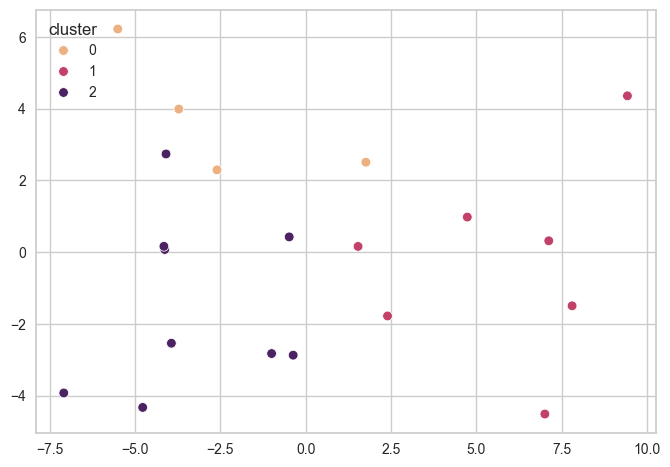

In [52]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaledInf)

dataInf_scaled_PCA = pca_2d.fit_transform(data_scaledInf)

sns.scatterplot(x=dataInf_scaled_PCA[:,0], y=dataInf_scaled_PCA[:,1], hue=data_inf['cluster'], palette='flare')

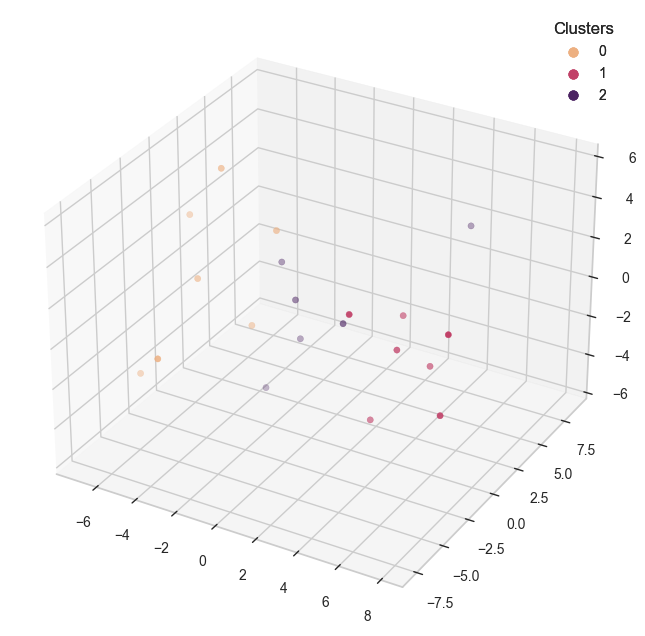

In [ ]:
# Membuat dimensi jadi 3D
pca_3d = PCA(n_components=3)
pca_3d.fit(data_scaled_pca)
df_scaled_pca_3d = pca_3d.transform(data_scaled_pca)

#  plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
scatter = ax.scatter(df_scaled_pca_3d[:, 0], df_scaled_pca_3d[:, 1], df_scaled_pca_3d[:, 2],
                     c=data_inf['cluster'], cmap='flare')

# legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()

# viii. Exploratory Data Analysis (EDA) Cluster

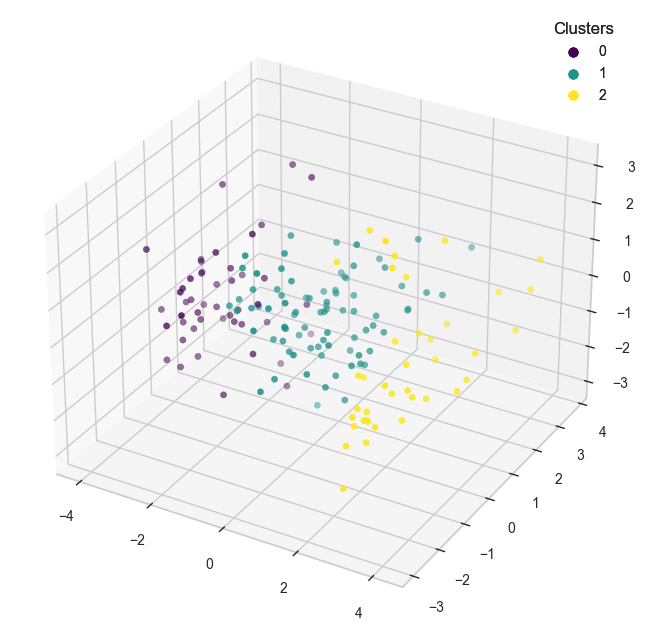

In [54]:
#  plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
scatter = ax.scatter(df_scaled_pca_3d[:, 0], df_scaled_pca_3d[:, 1], df_scaled_pca_3d[:, 2],
                     c=data_analyz['cluster'], cmap='viridis')

# legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()

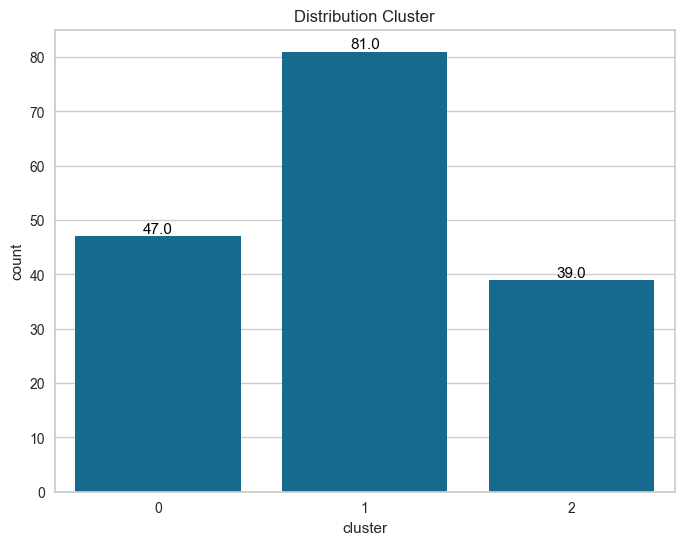

In [55]:
# Distribution Cluster
plt.figure(figsize=(8,6))
ax = sns.countplot(data=data_analyz, x='cluster')
plt.title('Distribution Cluster')
# Menambahkan notasi di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

Dari hasil visualisasi cluster 1 lebih besar dibandingkan yang lainnya disusul cluster 0 dan 2.` artinya ada 81 Negara di cluster 1, 47 Negara di cluster 0 dan 39 Negara di cluster 2`


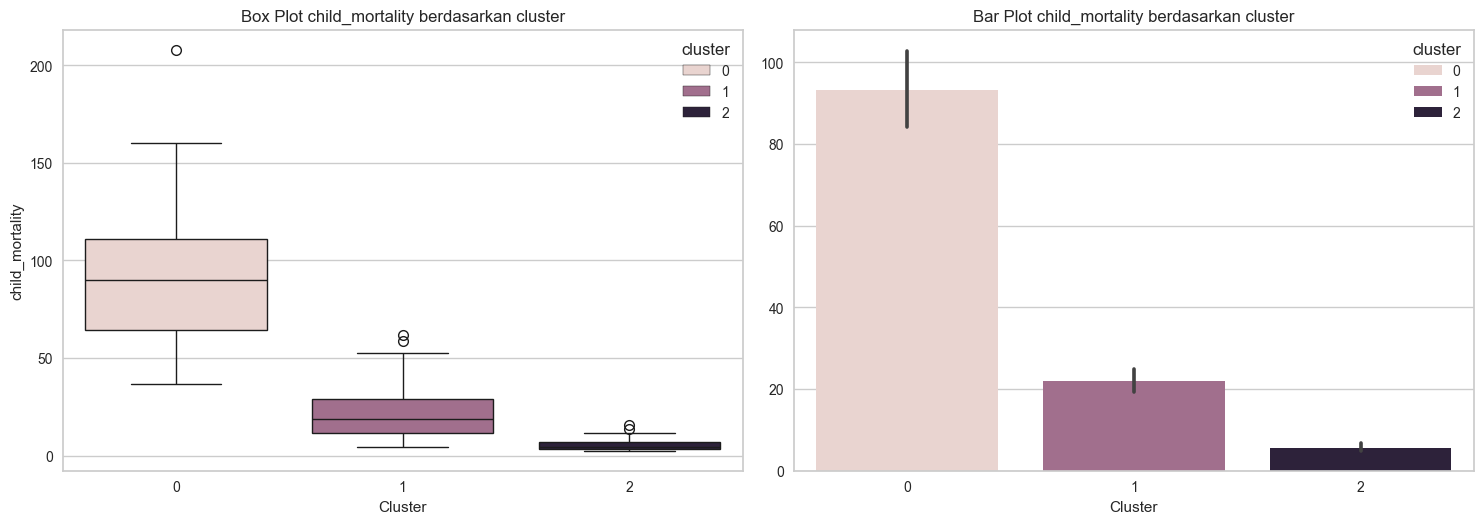

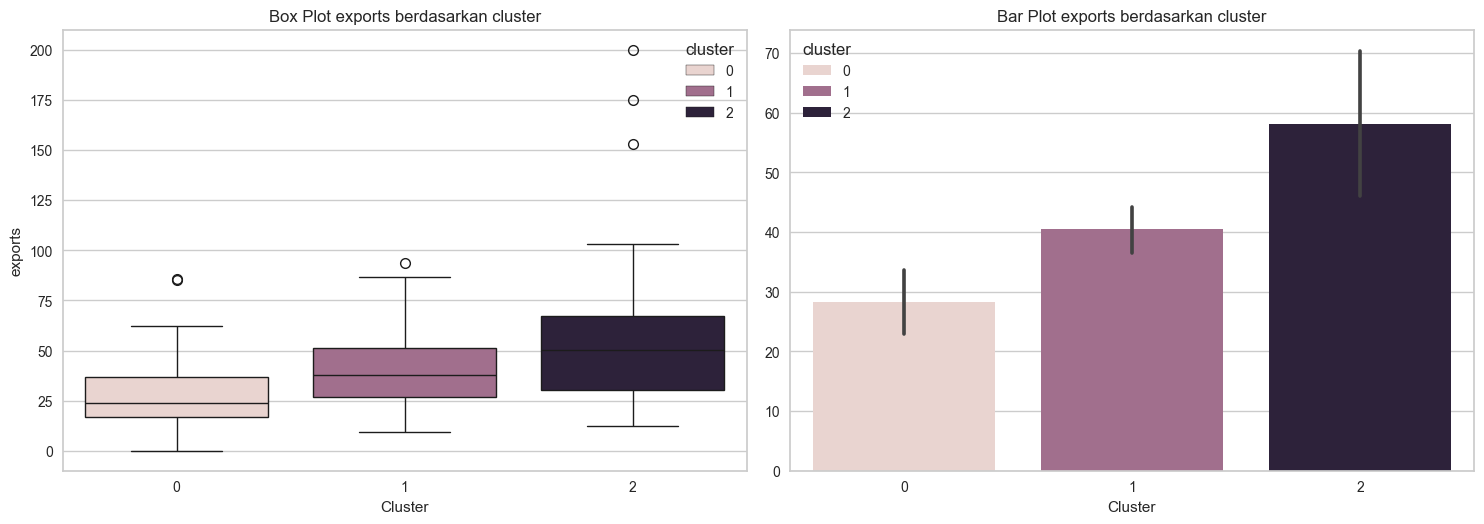

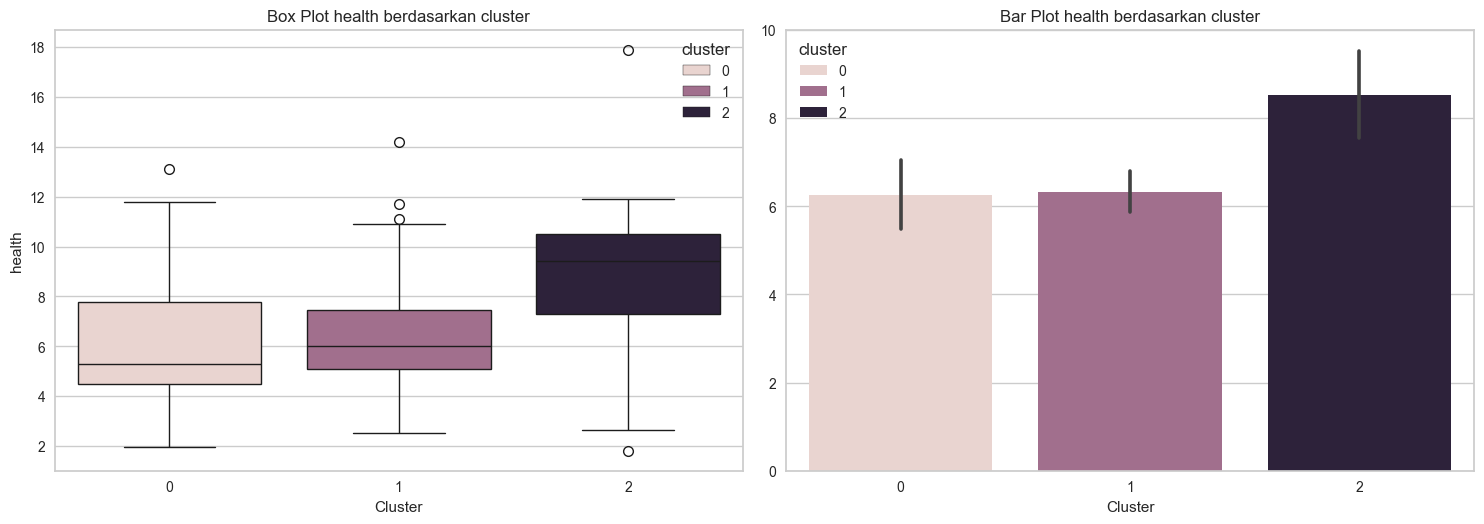

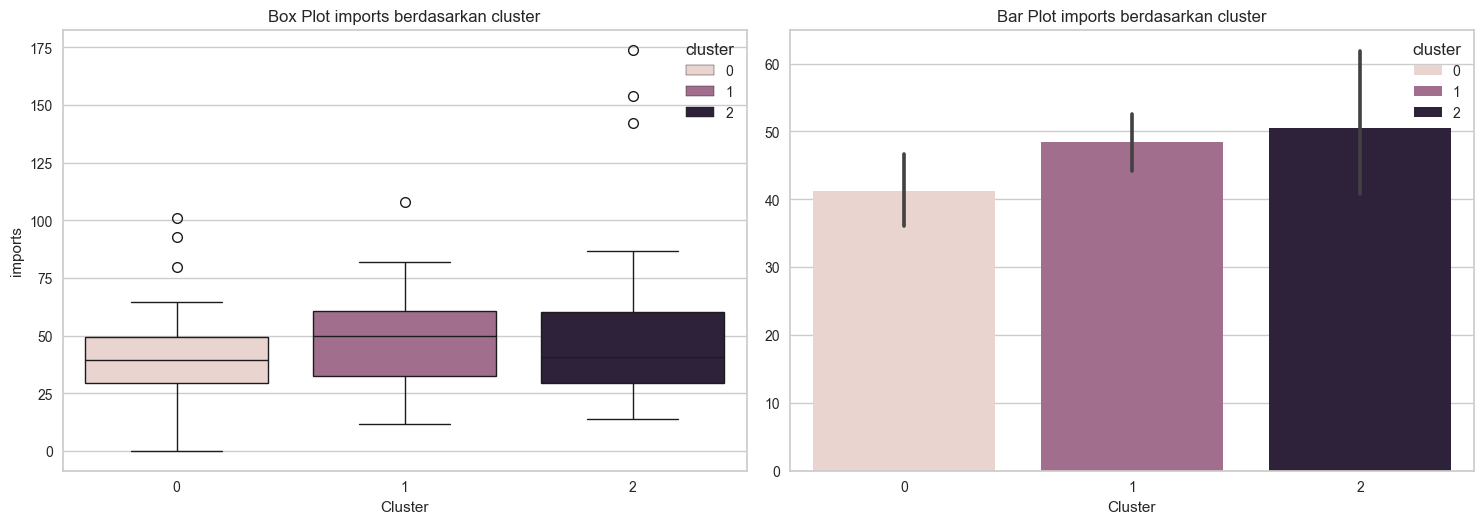

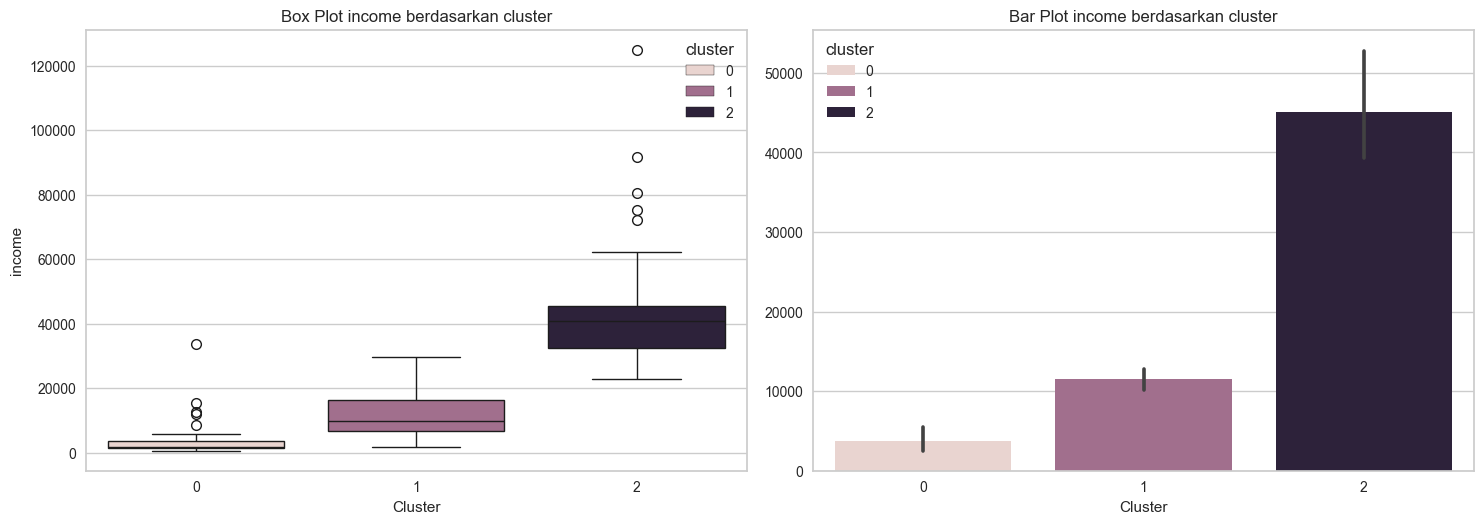

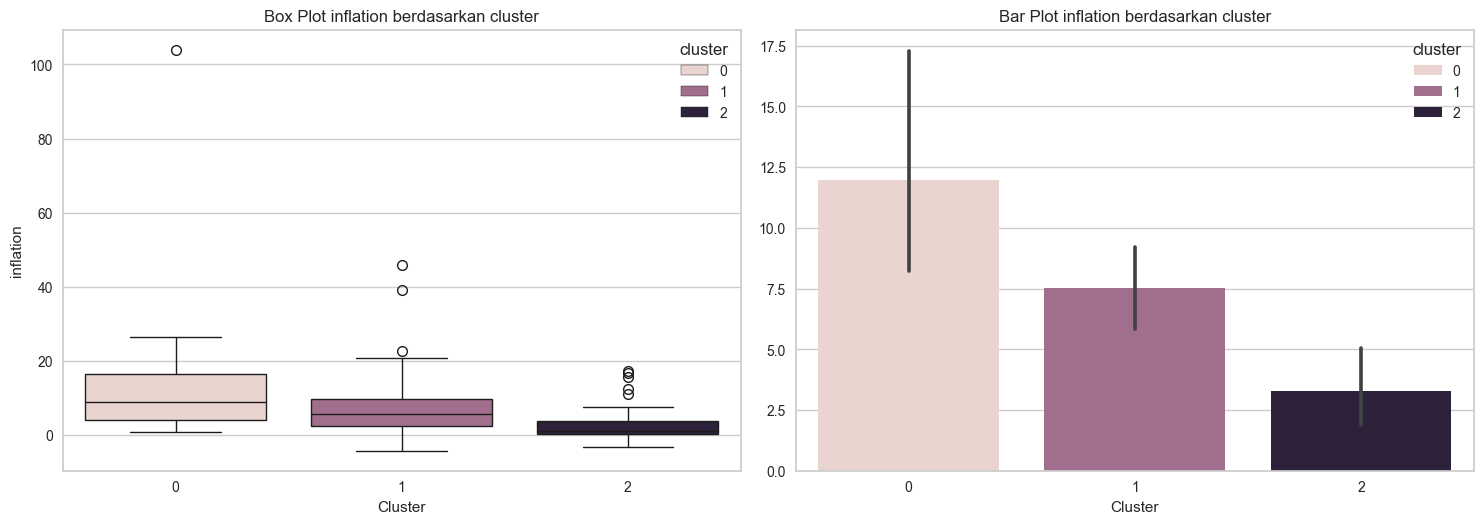

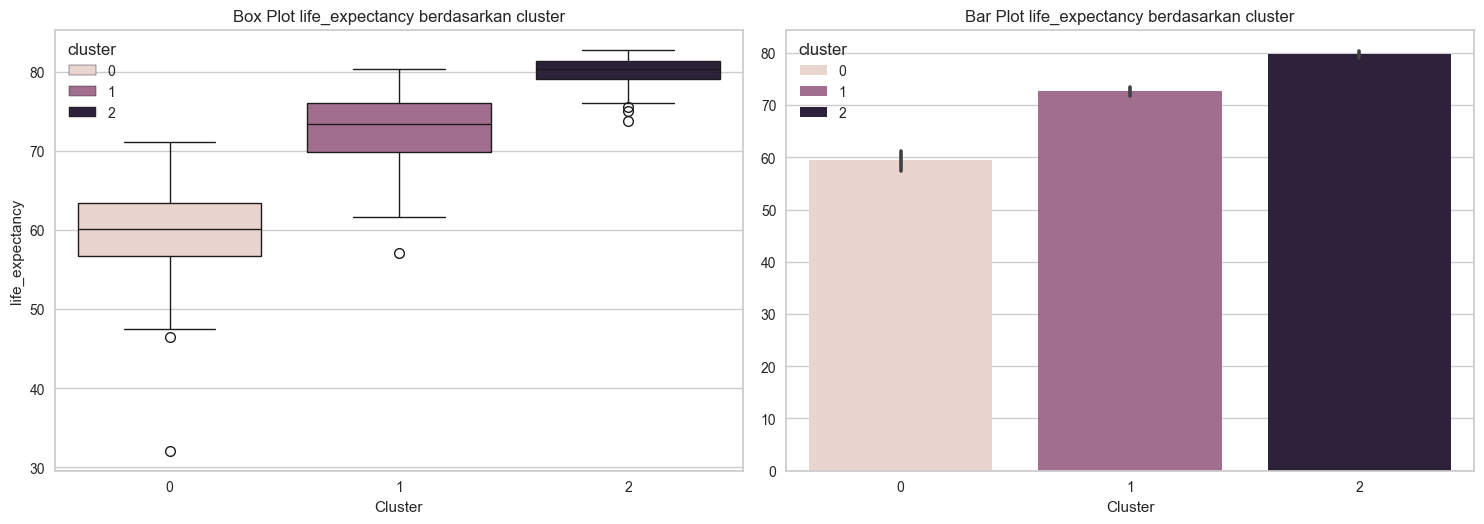

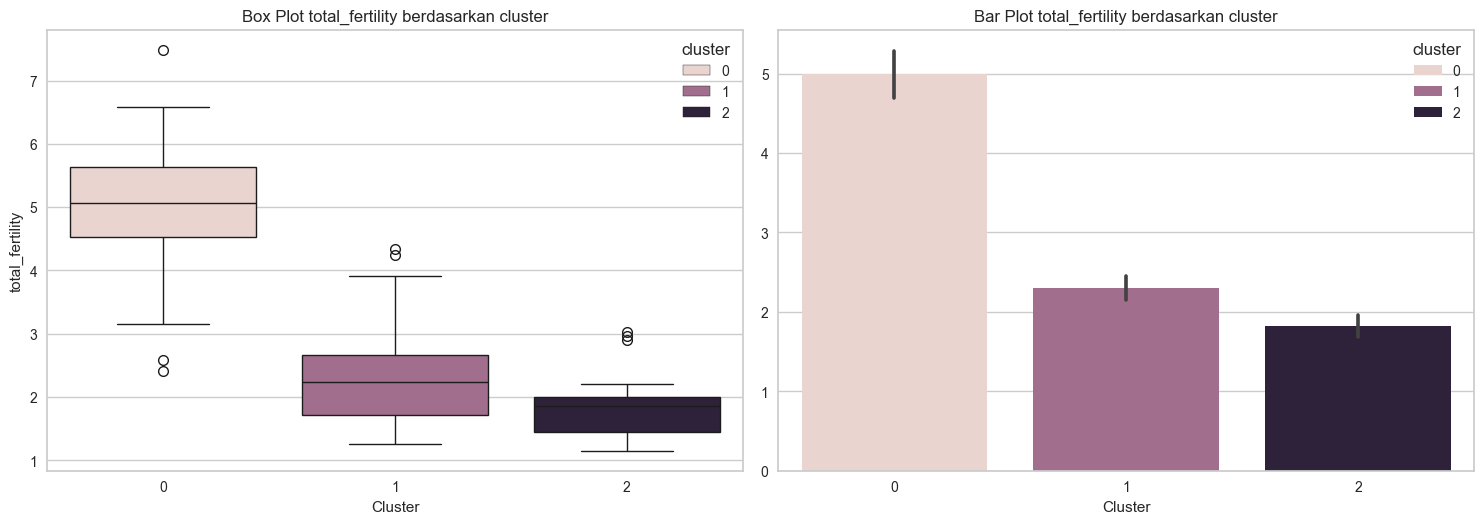

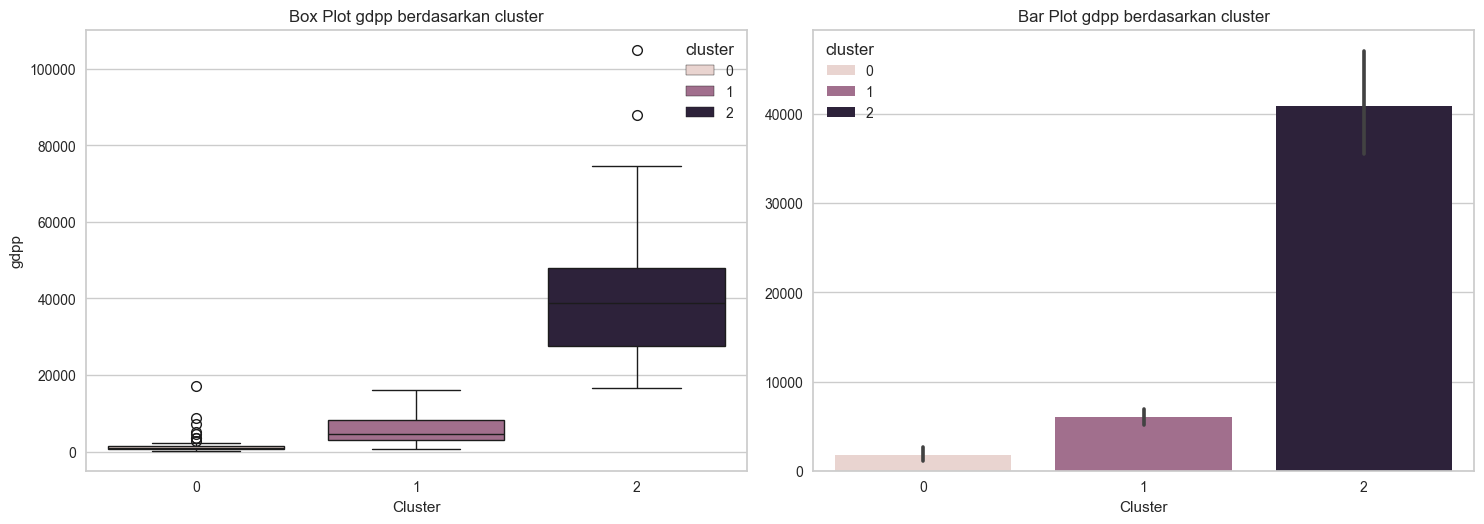

In [58]:
# Visualisasi kolom berpengaruh

cols_selected = ['child_mortality', 'exports', 'health', 'imports', 'income','inflation', 'life_expectancy', 'total_fertility', 'gdpp']



for col in cols_selected:
    plt.figure(figsize=(15,10))

    plt.subplot(2,2,1)
    sns.boxplot(data=data_analyz,y=col,x='cluster',  hue='cluster' )
    plt.title(f'Box Plot {col} berdasarkan cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)

    plt.subplot(2,2,2)
    sns.barplot(data=data_analyz, x='cluster',y=col, hue='cluster')
    plt.title(f'Bar Plot {col} berdasarkan cluster')
    plt.ylabel('')
    plt.xlabel('Cluster')

    plt.tight_layout()
    plt.show()

Indikasi kolom kenaikan dan penurunan. jika nilai suatu kolom naik berpengaruh terhadap negara:

jika naik (positif): 
- child_mortality
- exports
- income
- life_expectancy
- total_fertility
- gdpp

jika turun positif
- inflation


jika naik(negatif):
- health	
- imports
- inflation

Explained:

Bedasarkan visualisasi dengan loop kolom berpengaruh saya kategorikan dari nilai rendah, sedang dan tinggi dalam hal ini saya simpulkan `cluster 0 (nol) sebagai Negara miskin`, `cluster 1 (satu) sebagai negara cukup stabil`, dan `cluster 2(dua) sebagai negara stabil`.

Berdasarkan penjelasan tersebut bahwa saya akan merekomendasikan `cluster 0` dari 'child_mortality', 'exports', 'health', 'imports', 'income','inflation', 'life_expectancy', 'total_fertility', dan 'gdpp' indikasi bahwa negara tersebut miskin sehingga perioritas kita

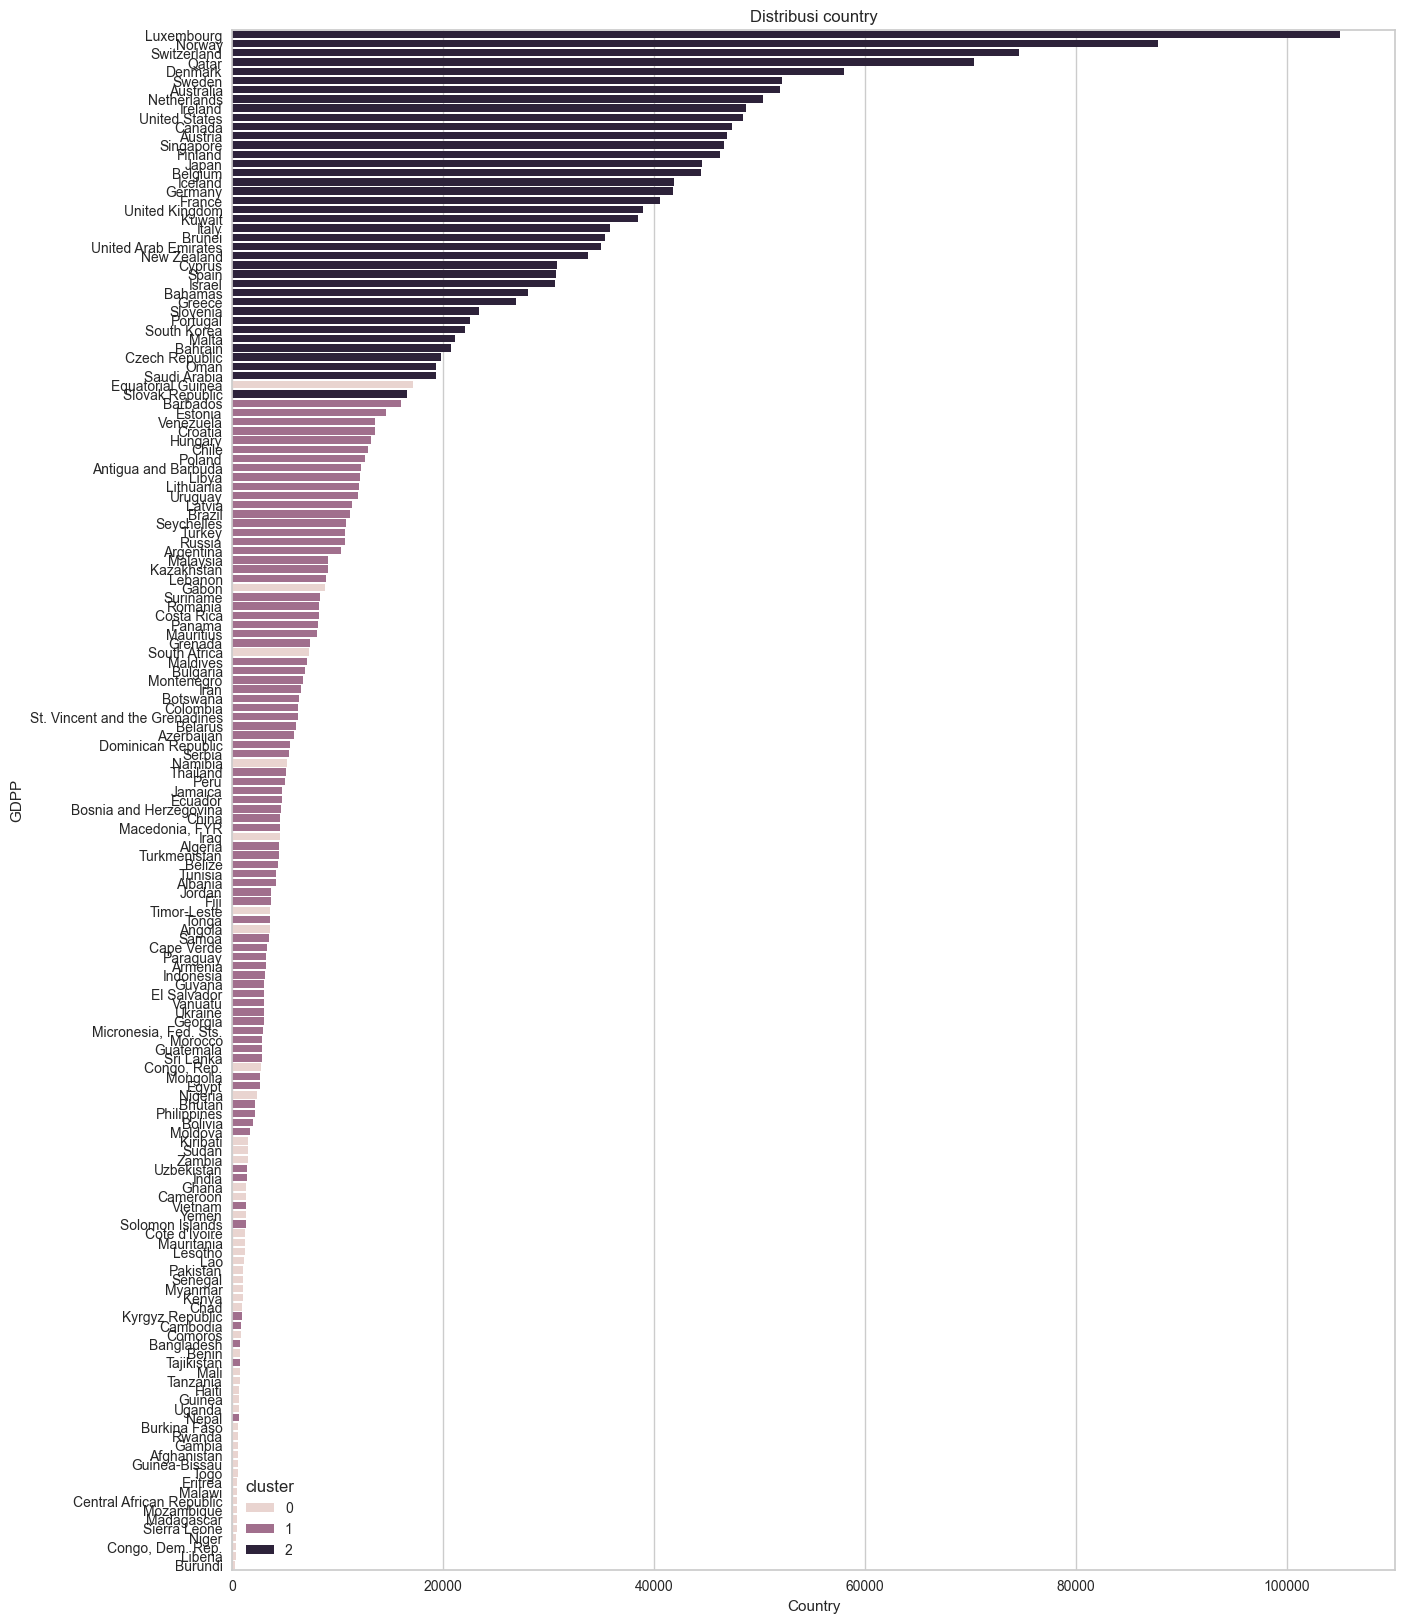

In [62]:
# plot data dari negara yang murah sampai yang termahal
plt.figure(figsize=(15, 20))
df_sorted = data_analyz.sort_values(by='gdpp', ascending=False)

sns.barplot(x='gdpp', y='country', data=df_sorted, hue='cluster', estimator=np.mean)

plt.title('Distribusi country')
plt.xlabel('Country')
plt.ylabel('GDPP')

plt.show()



In [64]:
df_sorted = data_analyz.sort_values(by='gdpp', ascending=True)
negara_miskin = df_sorted.head(10)

In [65]:
negara_miskin

country  child_mortality  exports  health  imports  \
26                    Burundi             93.6     8.92   11.60     39.2   
88                    Liberia             89.3    19.10   11.80     92.6   
37           Congo, Dem. Rep.            116.0    41.10    7.91     49.6   
112                     Niger            123.0    22.20    5.16     49.1   
132              Sierra Leone            160.0    16.80   13.10     34.5   
93                 Madagascar             62.2    25.00    3.77     43.0   
106                Mozambique            101.0    31.50    5.21     46.2   
31   Central African Republic            149.0    11.80    3.98     26.5   
94                     Malawi             90.5    22.80    6.59     34.9   
50                    Eritrea             55.2     4.79    2.66     23.3   

     income  inflation  life_expectancy  total_fertility  gdpp  cluster  
26      764      12.30             57.7             6.26   231        0  
88      700       5.47             60.8             5.02   327        0  
37      609      20.80             57.5             6.54   334        0  
112     814       2.55             58.8             7.49   348        0  
132    1220      17.20             55.0             5.20   399        0  
93     1390       8.79             60.8             4.60   413        0  
106     918       7.64             54.5             5.56   419        0  
31      888       2.01             47.5             5.21   446        0  
94     1030      12.10             53.1             5.31   459        0  
50     1420      11.60             61.7             4.61   482        0

In [68]:
data_cluster_0 = data_analyz[data_analyz['cluster'] == 0]
data_sort_cluster0 = data_cluster_0.sort_values(by='gdpp')
top_rekomendasi_5_Negara_yang_harus_dibantu_cluster0 = data_sort_cluster0.head(5)
top_rekomendasi_5_Negara_yang_harus_dibantu_cluster0

country  child_mortality  exports  health  imports  income  \
26            Burundi             93.6     8.92   11.60     39.2     764   
88            Liberia             89.3    19.10   11.80     92.6     700   
37   Congo, Dem. Rep.            116.0    41.10    7.91     49.6     609   
112             Niger            123.0    22.20    5.16     49.1     814   
132      Sierra Leone            160.0    16.80   13.10     34.5    1220   

     inflation  life_expectancy  total_fertility  gdpp  cluster  
26       12.30             57.7             6.26   231        0  
88        5.47             60.8             5.02   327        0  
37       20.80             57.5             6.54   334        0  
112       2.55             58.8             7.49   348        0  
132      17.20             55.0             5.20   399        0

# Kesimpulan

Berdasarkan analisis saya bahwa ada perbedaan antara analisis sederhana dengan analisis setelah clustering terutama dalam keakuratan dalam mengelompokan data, clustering lebih jelas

Negara yang saya rekomendasikan untuk di bantu Adalah `Burundi`,`Liberia`,`Congo, Dem. Rep.`,`Niger`,dan `Sierra Leone`

artikel untuk refernce:
https://www.detik.com/sumut/bisnis/d-6848779/daftar-10-negara-termiskin-di-dunia-2023-versi-bank-dunia